In [1]:
%%HTML
<script src="require.js"></script>

In [2]:
from IPython.display import HTML
HTML('''<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js "></script><script>
code_show=true; 
function code_toggle() {
if (code_show){
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').hide();
} else {
$('div.jp-CodeCell > div.jp-Cell-inputWrapper').show();
}
code_show = !code_show
} 
$( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Toggle on/off for raw code"></form>
''')

![title_banner.jpg](title_banner.jpg)

**Author:** James Ballesteros  

-----
### INTRODUCTION AND STATEMENT OF THE PROBLEM

Air pollution is a major concern that impacts public health and global climate. This is primarily due to rapid urbanization and industrialization. This situation highlights the need for a monitoring and prediction model for air pollutant levels. Traditional methods of modeling air quality often require domain knowledge. Additionally, the computational models to be used are manually selected. The model selection process can be time-consuming as the researcher needs to go through each model. There is also the possibility of not getting the optimal results as the performance of the model used depends on arbitrarily used parameters.

With the advent of technology, machine learning (ML) models have gained popularity in various fileds, including environmental data analysis. However, given the multi-faceted nature of environmental data, the selection of the model still proves to be a challenge. Just with traditional methods, the ML approach still involves trial and error in the identification of the optimal parameters.

The AutoML approach in identifying the best ML model to use for air quality analysis and prediction might prove to be a good exercise. The study aims to implement a multi-model assessment approach in comparing various regression models like Gradient Boosting, Random Forest and Linear regressors, to name a few, and selecting the best model to use. The identified model can help in identifying the most predictive features influencing air quality levels (De Vito et al., 2008).

------
### HIGHLIGHTS

Key highlights of the study, include, but is not limited to, the following:
- Application of AutoML in identifying the best ML model from a suite of ML models for predicting key air quality indicators.
- Gradient Boosting Method (GBM) outperformed other models in predicting multiple air pollutants.
- Identification of primary and secondary pollutant predictors for various air quality metrics using feature importance analysis.
- Used cross-validation to ensure robustness and reliability of the chosen model.

-----

### IMPORT LIBRARIES

Below are the libraries used in the study.

In [3]:
# General modules
import threadpoolctl
import numpy as np
import pandas as pd

# For Plotting
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# For Modeling
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge, LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from tqdm import tqdm  # For progress bar
import time

# For suppressing warning messages
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning,
                        module='seaborn.axisgrid')

threadpoolctl.threadpool_limits(1, "blas")

---

### **DATA SOURCE**

The dataset used in this study is from UCI Machine Learning. The dataset is comprised of 9,471 instances of hourly averaged responses from five metal oxide chemical sensors within an air quality monitoring device in a highly polluted urban area in Italy. Measurement covered a one-year period (March 2004 to February 2005). Measured pollutants included `CO` (carbon dioxide, `NMHC` (non-methane hydrocarbons), `C6H6` (benzene), `NOx` (nitrous oxide), `NO2` (nitrous dioxide), and `O3` (ozone). Data colected exhibits potential cross-sensitivities and sensor drifts, which are challenges for accurate pollutant estimation (De Vito et al., 2008). Missing values are noted with a `-200` value.

The content of each field is shown below. All in all, there are <b>9,471 datapoints</b> and <b> 15 features</b>.

<b>Link to Dataset:</b> <a href='https://archive.ics.uci.edu/dataset/360/air+quality'>UCI AIr Quality Dataset</a>

<div align="center">
  <b>Air Quality Dataset Fields</b>
  <table>
    <thead>
      <tr>
        <th>Variable Name</th>
        <th>Role</th>
        <th>Type</th>
        <th>Demographic</th>
        <th>Description</th>
        <th>Units</th>
        <th>Missing Values</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Date</td>
        <td>Feature</td>
        <td>Date</td>
        <td></td>
        <td></td>
        <td></td>
        <td>no</td>
      </tr>
      <tr>
        <td>Time</td>
        <td>Feature</td>
        <td>Categorical</td>
        <td></td>
        <td></td>
        <td></td>
        <td>no</td>
      </tr>
      <tr>
        <td>CO(GT)</td>
        <td>Feature</td>
        <td>Integer</td>
        <td></td>
        <td>True hourly averaged concentration CO in mg/m^3 (reference analyzer)</td>
        <td>mg/m^3</td>
        <td>no</td>
      </tr>
      <tr>
        <td>PT08.S1(CO)</td>
        <td>Feature</td>
        <td>Categorical</td>
        <td></td>
        <td>hourly averaged sensor response (nominally CO targeted)</td>
        <td></td>
        <td>no</td>
      </tr>
      <tr>
        <td>NMHC(GT)</td>
        <td>Feature</td>
        <td>Integer</td>
        <td></td>
        <td>True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)</td>
        <td>microg/m^3</td>
        <td>no</td>
      </tr>
      <tr>
        <td>C6H6(GT)</td>
        <td>Feature</td>
        <td>Continuous</td>
        <td></td>
        <td>True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)</td>
        <td>microg/m^3</td>
        <td>no</td>
      </tr>
      <tr>
        <td>PT08.S2(NMHC)</td>
        <td>Feature</td>
        <td>Categorical</td>
        <td></td>
        <td>hourly averaged sensor response (nominally NMHC targeted)</td>
        <td></td>
        <td>no</td>
      </tr>
      <tr>
        <td>NOx(GT)</td>
        <td>Feature</td>
        <td>Integer</td>
        <td></td>
        <td>True hourly averaged NOx concentration in ppb (reference analyzer)</td>
        <td>ppb</td>
        <td>no</td>
      </tr>
      <tr>
        <td>PT08.S3(NOx)</td>
        <td>Feature</td>
        <td>Categorical</td>
        <td></td>
        <td>hourly averaged sensor response (nominally NOx targeted)</td>
        <td></td>
        <td>no</td>
      </tr>
      <tr>
        <td>NO2(GT)</td>
        <td>Feature</td>
        <td>Integer</td>
        <td></td>
        <td>True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)</td>
        <td>microg/m^3</td>
        <td>no</td>
      </tr>
      <tr>
        <td>PT08.S4(NO2)</td>
        <td>Feature</td>
        <td>Categorical</td>
        <td></td>
        <td>hourly averaged sensor response (nominally NO2 targeted)</td>
        <td></td>
        <td>no</td>
      </tr>
      <tr>
        <td>PT08.S5(O3)</td>
        <td>Feature</td>
        <td>Categorical</td>
        <td></td>
        <td>hourly averaged sensor response (nominally O3 targeted)</td>
        <td></td>
        <td>no</td>
      </tr>
      <tr>
        <td>T</td>
        <td>Feature</td>
        <td>Continuous</td>
        <td></td>
        <td>Temperature</td>
        <td>&deg;C</td>
        <td>no</td>
      </tr>
      <tr>
        <td>RH</td>
        <td>Feature</td>
        <td>Continuous</td>
        <td></td>
        <td>Relative Humidity</td>
        <td>%</td>
        <td>no</td>
      </tr>
      <tr>
        <td>AH</td>
        <td>Feature</td>
        <td>Continuous</td>
        <td></td>
        <td>Absolute Humidity</td>
        <td></td>
        <td>no</td>
      </tr>
    </tbody>
  </table>
</div>

-----

### LOAD AND PRE-PROCESS DATA

The dataset was loaded as a dataframe.

In [4]:
airqual_df = pd.read_csv("AirQualityUCI.csv", sep=";", decimal=",")
airqual_df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9466         NaN       NaN     NaN          NaN       NaN       NaN   
9467         NaN       NaN     NaN          NaN       NaN       NaN   
9468         NaN       NaN     NaN          NaN       NaN       NaN   
9469         NaN       NaN     NaN          NaN       NaN       NaN   
9470         NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9466            NaN      NaN           NaN      NaN           NaN   
9467            NaN      NaN           NaN      NaN           NaN   
9468            NaN      NaN           NaN      NaN           NaN   
9469            NaN      NaN           NaN      NaN           NaN   
9470            NaN      NaN           NaN      NaN           NaN   

      PT08.S5(O3)     T    RH      AH  Unnamed: 15  Unnamed: 16  
0          1268.0  13.6  48.9  0.7578          NaN          NaN  
1           972.0  13.3  47.7  0.7255          NaN          NaN  
2          1074.0  11.9  54.0  0.7502          NaN          NaN  
3          1203.0  11.0  60.0  0.7867          NaN          NaN  
4          1110.0  11.2  59.6  0.7888          NaN          NaN  
...           ...   ...   ...     ...          ...          ...  
9466          NaN   NaN   NaN     NaN          NaN          NaN  
9467          NaN   NaN   NaN     NaN          NaN          NaN  
9468          NaN   NaN   NaN     NaN          NaN          NaN  
9469          NaN   NaN   NaN     NaN          NaN          NaN  
9470          NaN   NaN   NaN     NaN          NaN          NaN  

[9471 rows x 17 columns]

It can be noted that there are two columns, namely `Unnamed: 15` and `Unnamed: 16`, that have `NaN` values. We laso have rows with `NaN` values. So these columns were dropped.

In [5]:
airqual_df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1,
                inplace=True, errors='ignore')
airqual_df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9466         NaN       NaN     NaN          NaN       NaN       NaN   
9467         NaN       NaN     NaN          NaN       NaN       NaN   
9468         NaN       NaN     NaN          NaN       NaN       NaN   
9469         NaN       NaN     NaN          NaN       NaN       NaN   
9470         NaN       NaN     NaN          NaN       NaN       NaN   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9466            NaN      NaN           NaN      NaN           NaN   
9467            NaN      NaN           NaN      NaN           NaN   
9468            NaN      NaN           NaN      NaN           NaN   
9469            NaN      NaN           NaN      NaN           NaN   
9470            NaN      NaN           NaN      NaN           NaN   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13.6  48.9  0.7578  
1           972.0  13.3  47.7  0.7255  
2          1074.0  11.9  54.0  0.7502  
3          1203.0  11.0  60.0  0.7867  
4          1110.0  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
9466          NaN   NaN   NaN     NaN  
9467          NaN   NaN   NaN     NaN  
9468          NaN   NaN   NaN     NaN  
9469          NaN   NaN   NaN     NaN  
9470          NaN   NaN   NaN     NaN  

[9471 rows x 15 columns]

Before doing anything about them the rows with `NaN` values, below is a look at the percentages of rows records with `NaN` for each of the columns.

In [6]:
df_airqual_percentage_NaNs = (airqual_df.isna().sum(
) / len(airqual_df) * 100).to_frame(name='%_NaN').sort_values(
    '%_NaN', ascending=False)
df_airqual_percentage_NaNs

%_NaN
Date           1.203674
Time           1.203674
CO(GT)         1.203674
PT08.S1(CO)    1.203674
NMHC(GT)       1.203674
C6H6(GT)       1.203674
PT08.S2(NMHC)  1.203674
NOx(GT)        1.203674
PT08.S3(NOx)   1.203674
NO2(GT)        1.203674
PT08.S4(NO2)   1.203674
PT08.S5(O3)    1.203674
T              1.203674
RH             1.203674
AH             1.203674

All columns have the same number of rows with `NaN` values and based from the last entries of the dataframe, these are the last rows. These rows were dropped.

In [7]:
airqual_df = airqual_df.dropna()
airqual_df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9352  04/04/2005  10.00.00     3.1       1314.0    -200.0      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0    -200.0      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0    -200.0      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0    -200.0       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0    -200.0      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13.6  48.9  0.7578  
1           972.0  13.3  47.7  0.7255  
2          1074.0  11.9  54.0  0.7502  
3          1203.0  11.0  60.0  0.7867  
4          1110.0  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028  

[9357 rows x 15 columns]

Below presents a review of the information.

In [8]:
airqual_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


From the dataset documentaion, missing values were replaced with `-200` (Vito, 2016). These entries were replaced with `NaN`.

In [9]:
airqual_df.loc[:, :] = airqual_df.replace(to_replace=-200, value=np.nan)
airqual_df

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  \
0     10/03/2004  18.00.00     2.6       1360.0     150.0      11.9   
1     10/03/2004  19.00.00     2.0       1292.0     112.0       9.4   
2     10/03/2004  20.00.00     2.2       1402.0      88.0       9.0   
3     10/03/2004  21.00.00     2.2       1376.0      80.0       9.2   
4     10/03/2004  22.00.00     1.6       1272.0      51.0       6.5   
...          ...       ...     ...          ...       ...       ...   
9352  04/04/2005  10.00.00     3.1       1314.0       NaN      13.5   
9353  04/04/2005  11.00.00     2.4       1163.0       NaN      11.4   
9354  04/04/2005  12.00.00     2.4       1142.0       NaN      12.4   
9355  04/04/2005  13.00.00     2.1       1003.0       NaN       9.5   
9356  04/04/2005  14.00.00     2.2       1071.0       NaN      11.9   

      PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  \
0            1046.0    166.0        1056.0    113.0        1692.0   
1             955.0    103.0        1174.0     92.0        1559.0   
2             939.0    131.0        1140.0    114.0        1555.0   
3             948.0    172.0        1092.0    122.0        1584.0   
4             836.0    131.0        1205.0    116.0        1490.0   
...             ...      ...           ...      ...           ...   
9352         1101.0    472.0         539.0    190.0        1374.0   
9353         1027.0    353.0         604.0    179.0        1264.0   
9354         1063.0    293.0         603.0    175.0        1241.0   
9355          961.0    235.0         702.0    156.0        1041.0   
9356         1047.0    265.0         654.0    168.0        1129.0   

      PT08.S5(O3)     T    RH      AH  
0          1268.0  13.6  48.9  0.7578  
1           972.0  13.3  47.7  0.7255  
2          1074.0  11.9  54.0  0.7502  
3          1203.0  11.0  60.0  0.7867  
4          1110.0  11.2  59.6  0.7888  
...           ...   ...   ...     ...  
9352       1729.0  21.9  29.3  0.7568  
9353       1269.0  24.3  23.7  0.7119  
9354       1092.0  26.9  18.3  0.6406  
9355        770.0  28.3  13.5  0.5139  
9356        816.0  28.5  13.1  0.5028  

[9357 rows x 15 columns]

Below presents a review of the information.

In [10]:
airqual_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         7674 non-null   float64
 3   PT08.S1(CO)    8991 non-null   float64
 4   NMHC(GT)       914 non-null    float64
 5   C6H6(GT)       8991 non-null   float64
 6   PT08.S2(NMHC)  8991 non-null   float64
 7   NOx(GT)        7718 non-null   float64
 8   PT08.S3(NOx)   8991 non-null   float64
 9   NO2(GT)        7715 non-null   float64
 10  PT08.S4(NO2)   8991 non-null   float64
 11  PT08.S5(O3)    8991 non-null   float64
 12  T              8991 non-null   float64
 13  RH             8991 non-null   float64
 14  AH             8991 non-null   float64
dtypes: float64(13), object(2)
memory usage: 1.1+ MB


In [11]:
df_airqual_percentage_NaNs = (airqual_df.isna().sum(
) / len(airqual_df) * 100).to_frame(name='%_NaN').sort_values(
    '%_NaN', ascending=False)
df_airqual_percentage_NaNs

%_NaN
NMHC(GT)       90.231912
CO(GT)         17.986534
NO2(GT)        17.548360
NOx(GT)        17.516298
PT08.S1(CO)     3.911510
C6H6(GT)        3.911510
PT08.S2(NMHC)   3.911510
PT08.S3(NOx)    3.911510
PT08.S4(NO2)    3.911510
PT08.S5(O3)     3.911510
T               3.911510
RH              3.911510
AH              3.911510
Date            0.000000
Time            0.000000

A significant percentage of the dataset has missing values for` NMHC(GT)`. Dropping records where it is missing values will result in losing a lot of data. However, `PT08.S2(NMHC)` only has minimal `NaN` values `3.9% NaN` values, and can still serve  as `NMHC` feature. This column was dropped.

In [12]:
airqual_df = airqual_df.copy()
airqual_df.drop('NMHC(GT)', axis=1, inplace=True, errors='ignore')
airqual_df

Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
0     10/03/2004  18.00.00     2.6       1360.0      11.9         1046.0   
1     10/03/2004  19.00.00     2.0       1292.0       9.4          955.0   
2     10/03/2004  20.00.00     2.2       1402.0       9.0          939.0   
3     10/03/2004  21.00.00     2.2       1376.0       9.2          948.0   
4     10/03/2004  22.00.00     1.6       1272.0       6.5          836.0   
...          ...       ...     ...          ...       ...            ...   
9352  04/04/2005  10.00.00     3.1       1314.0      13.5         1101.0   
9353  04/04/2005  11.00.00     2.4       1163.0      11.4         1027.0   
9354  04/04/2005  12.00.00     2.4       1142.0      12.4         1063.0   
9355  04/04/2005  13.00.00     2.1       1003.0       9.5          961.0   
9356  04/04/2005  14.00.00     2.2       1071.0      11.9         1047.0   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0       166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1       103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2       131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3       172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4       131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   
...       ...           ...      ...           ...          ...   ...   ...   
9352    472.0         539.0    190.0        1374.0       1729.0  21.9  29.3   
9353    353.0         604.0    179.0        1264.0       1269.0  24.3  23.7   
9354    293.0         603.0    175.0        1241.0       1092.0  26.9  18.3   
9355    235.0         702.0    156.0        1041.0        770.0  28.3  13.5   
9356    265.0         654.0    168.0        1129.0        816.0  28.5  13.1   

          AH  
0     0.7578  
1     0.7255  
2     0.7502  
3     0.7867  
4     0.7888  
...      ...  
9352  0.7568  
9353  0.7119  
9354  0.6406  
9355  0.5139  
9356  0.5028  

[9357 rows x 14 columns]

Below presents a review of the `NaN` information.

In [13]:
df_airqual_percentage_NaNs = (airqual_df.isna().sum(
) / len(airqual_df) * 100).to_frame(name='%_NaN').sort_values(
    '%_NaN', ascending=False)
df_airqual_percentage_NaNs

%_NaN
CO(GT)         17.986534
NO2(GT)        17.548360
NOx(GT)        17.516298
PT08.S1(CO)     3.911510
C6H6(GT)        3.911510
PT08.S2(NMHC)   3.911510
PT08.S3(NOx)    3.911510
PT08.S4(NO2)    3.911510
PT08.S5(O3)     3.911510
T               3.911510
RH              3.911510
AH              3.911510
Date            0.000000
Time            0.000000

`CO(GT)`,`NO2(GT)` and `NOx(GT)` have quite a high number of `NaN`. Before proceeding, a look at the dataset if it has ouutliers that could affect analysis.

Below is a boxplot visualization of the dataset.

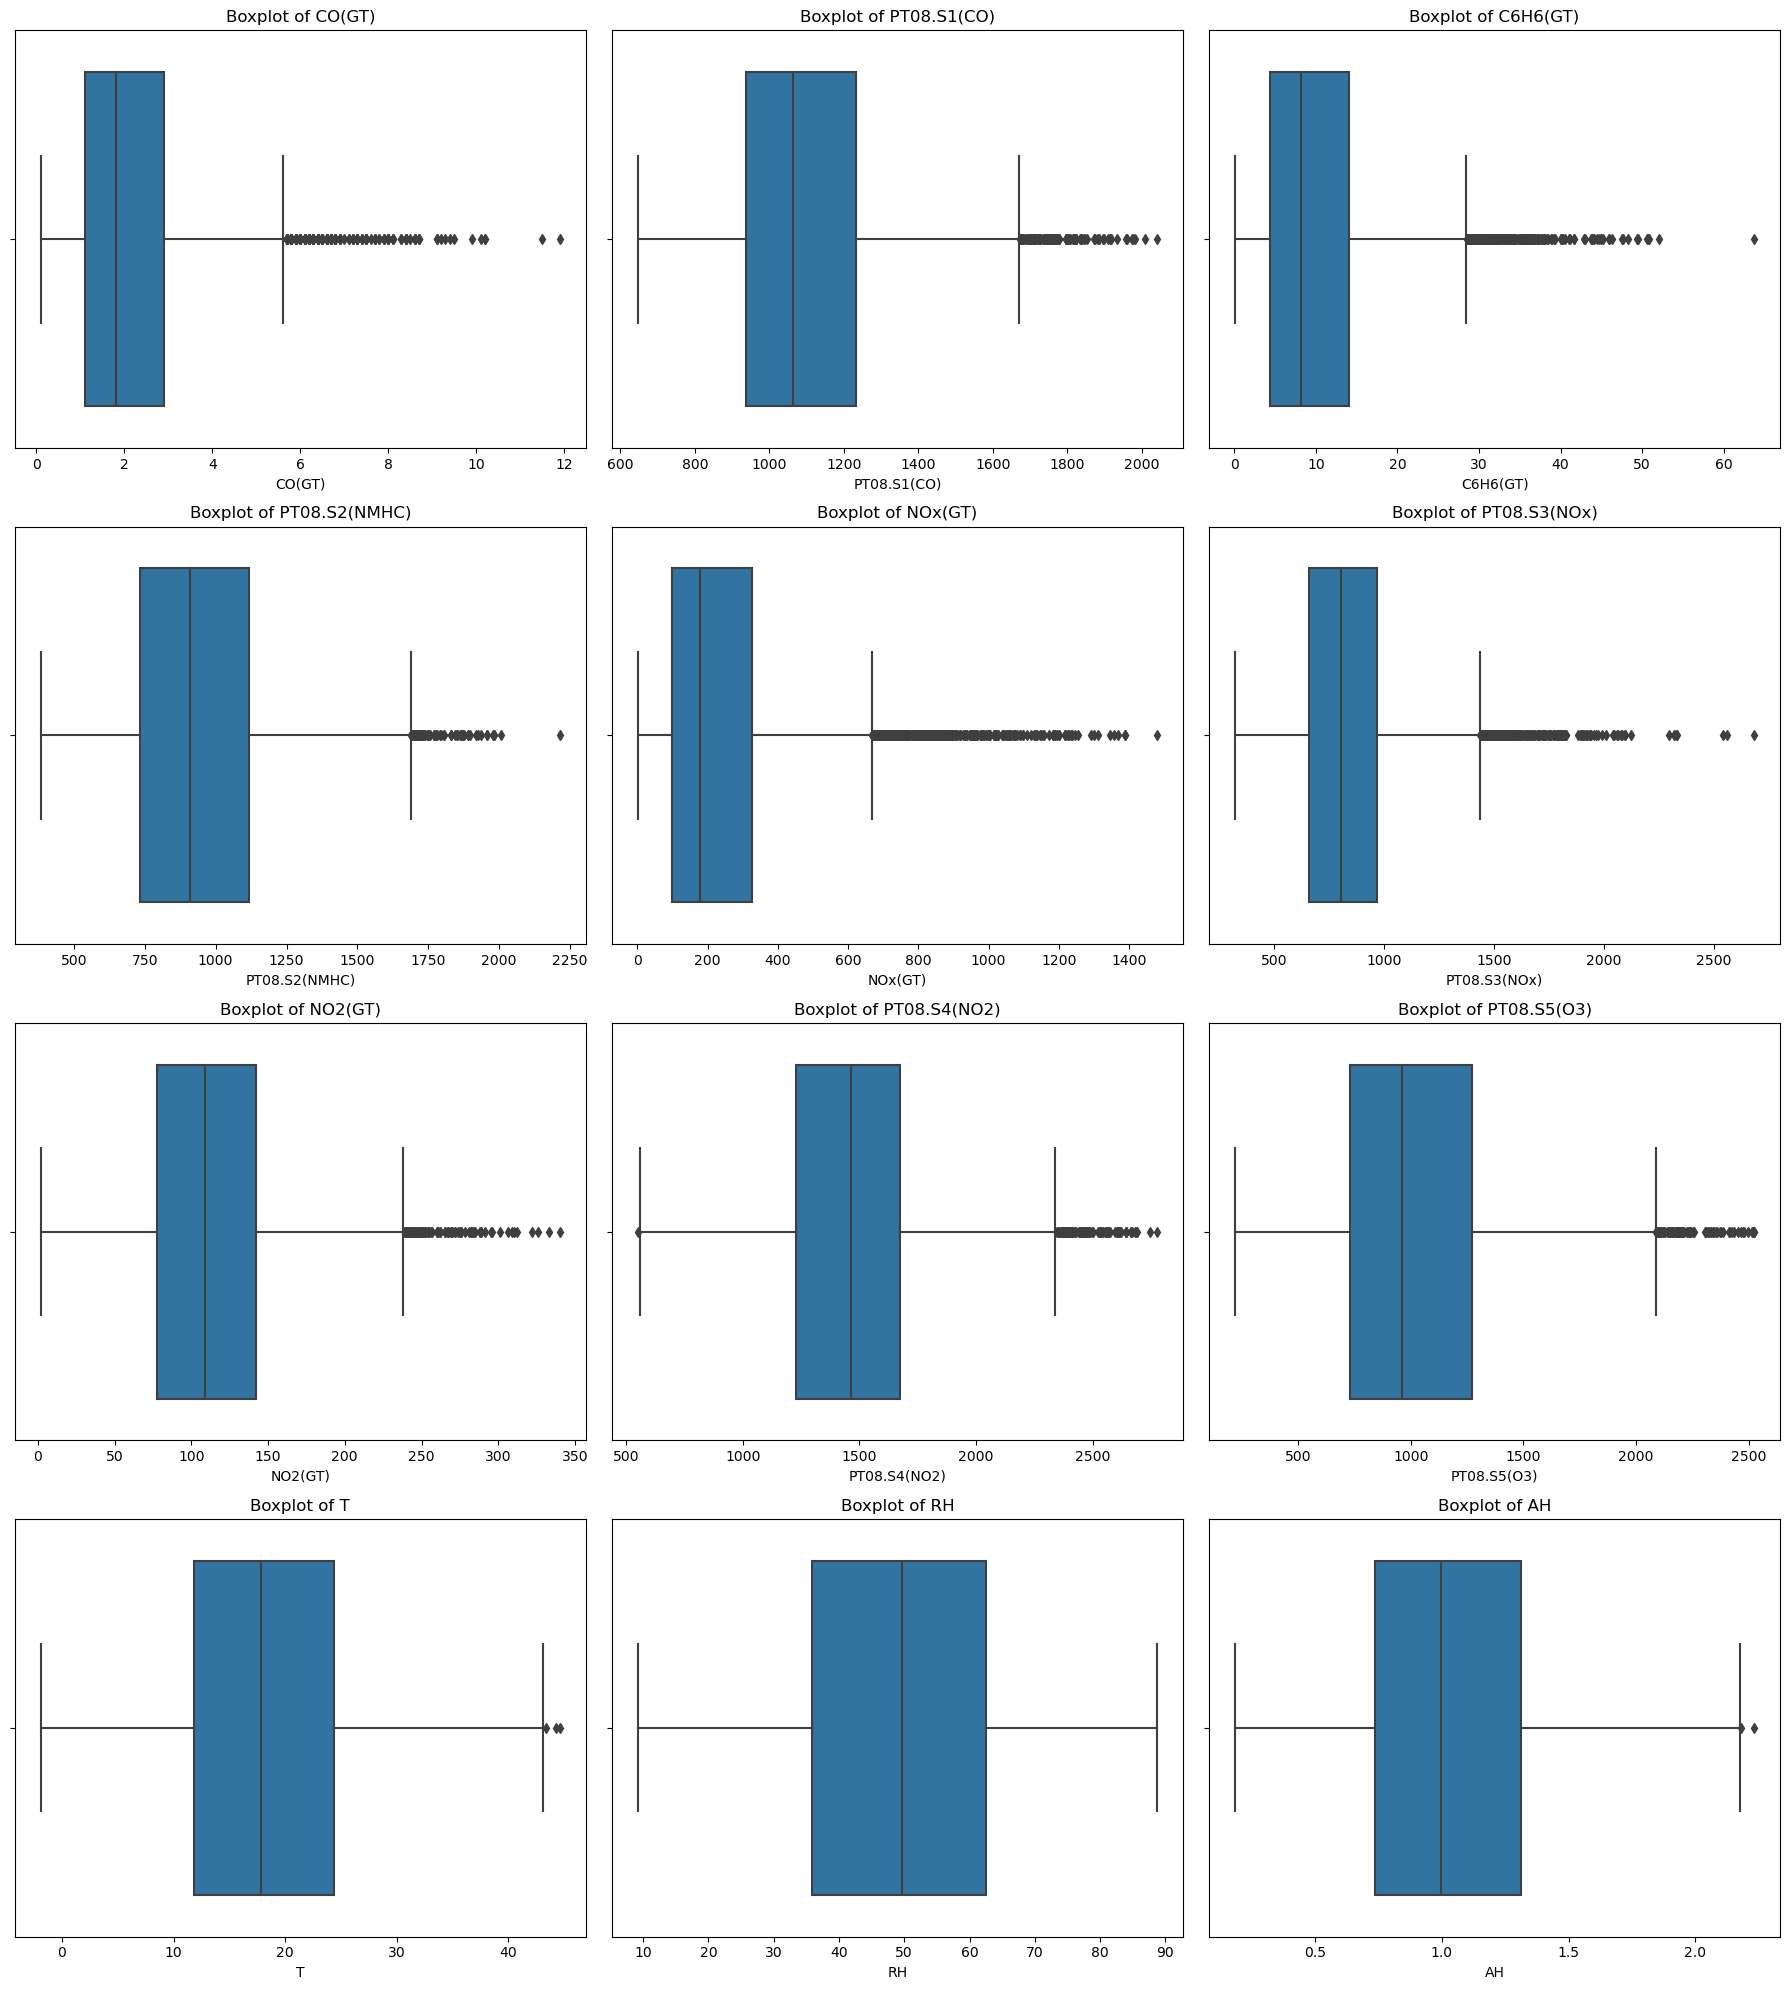

In [14]:
numerical_columns = airqual_df.select_dtypes(include=[np.number]).columns

n_cols = 3
n_rows = len(numerical_columns) // n_cols + \
    (len(numerical_columns) % n_cols > 0)

plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=airqual_df[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
# plt.savefig('boxplots_raw.png', dpi=300)
plt.show()

The boxplots show that a number of the features have a good amount of outliers.

Below, the Inter Quantile Range was used. The default threshold of 1.5 was  used.

In [15]:
numeric_cols = airqual_df.select_dtypes(include=[np.number]).columns

# Apply IQR to numeric columns only
Q1 = airqual_df[numeric_cols].quantile(0.25)
Q3 = airqual_df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

condition = ~((airqual_df[numeric_cols] < lower_bound) | (
    airqual_df[numeric_cols] > upper_bound)).any(axis=1)

airqual_df_filtered = airqual_df[condition]
airqual_df_filtered

Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
0     10/03/2004  18.00.00     2.6       1360.0      11.9         1046.0   
1     10/03/2004  19.00.00     2.0       1292.0       9.4          955.0   
2     10/03/2004  20.00.00     2.2       1402.0       9.0          939.0   
3     10/03/2004  21.00.00     2.2       1376.0       9.2          948.0   
4     10/03/2004  22.00.00     1.6       1272.0       6.5          836.0   
...          ...       ...     ...          ...       ...            ...   
9352  04/04/2005  10.00.00     3.1       1314.0      13.5         1101.0   
9353  04/04/2005  11.00.00     2.4       1163.0      11.4         1027.0   
9354  04/04/2005  12.00.00     2.4       1142.0      12.4         1063.0   
9355  04/04/2005  13.00.00     2.1       1003.0       9.5          961.0   
9356  04/04/2005  14.00.00     2.2       1071.0      11.9         1047.0   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0       166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1       103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2       131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3       172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4       131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   
...       ...           ...      ...           ...          ...   ...   ...   
9352    472.0         539.0    190.0        1374.0       1729.0  21.9  29.3   
9353    353.0         604.0    179.0        1264.0       1269.0  24.3  23.7   
9354    293.0         603.0    175.0        1241.0       1092.0  26.9  18.3   
9355    235.0         702.0    156.0        1041.0        770.0  28.3  13.5   
9356    265.0         654.0    168.0        1129.0        816.0  28.5  13.1   

          AH  
0     0.7578  
1     0.7255  
2     0.7502  
3     0.7867  
4     0.7888  
...      ...  
9352  0.7568  
9353  0.7119  
9354  0.6406  
9355  0.5139  
9356  0.5028  

[8458 rows x 14 columns]

Below presents a review of the information.

In [16]:
airqual_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8458 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8458 non-null   object 
 1   Time           8458 non-null   object 
 2   CO(GT)         6877 non-null   float64
 3   PT08.S1(CO)    8153 non-null   float64
 4   C6H6(GT)       8153 non-null   float64
 5   PT08.S2(NMHC)  8153 non-null   float64
 6   NOx(GT)        6913 non-null   float64
 7   PT08.S3(NOx)   8153 non-null   float64
 8   NO2(GT)        6910 non-null   float64
 9   PT08.S4(NO2)   8153 non-null   float64
 10  PT08.S5(O3)    8153 non-null   float64
 11  T              8153 non-null   float64
 12  RH             8153 non-null   float64
 13  AH             8153 non-null   float64
dtypes: float64(12), object(2)
memory usage: 991.2+ KB


In [17]:
df_airqual_percentage_NaNs = (airqual_df_filtered.isna().sum(
) / len(airqual_df_filtered) * 100).to_frame(name='%_NaN').sort_values(
    '%_NaN', ascending=False)
df_airqual_percentage_NaNs

%_NaN
CO(GT)         18.692362
NO2(GT)        18.302199
NOx(GT)        18.266730
PT08.S1(CO)     3.606053
C6H6(GT)        3.606053
PT08.S2(NMHC)   3.606053
PT08.S3(NOx)    3.606053
PT08.S4(NO2)    3.606053
PT08.S5(O3)     3.606053
T               3.606053
RH              3.606053
AH              3.606053
Date            0.000000
Time            0.000000

Since the percentage of missing values for most of the features `PT08.S1(CO)`, `C6H6(GT)`, `PT08.S2(NMHC)`, `PT08.S3(NOx)`, `PT08.S4(NO2)`, `PT08.S5(O3)`, `T`, `RH`, `AH` are low, Median imputation for the missing values is applied. This is to limit the effect of outliers in the dataset.

The `SimpleImputer` library was used for this.

In [18]:
median_imputer = SimpleImputer(strategy='median')

columns = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 
           'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']

for column in columns:
    imputed_data = median_imputer.fit_transform(airqual_df_filtered[[column]])
    airqual_df_filtered.loc[:, column] = imputed_data

airqual_df_filtered

Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
0     10/03/2004  18.00.00     2.6       1360.0      11.9         1046.0   
1     10/03/2004  19.00.00     2.0       1292.0       9.4          955.0   
2     10/03/2004  20.00.00     2.2       1402.0       9.0          939.0   
3     10/03/2004  21.00.00     2.2       1376.0       9.2          948.0   
4     10/03/2004  22.00.00     1.6       1272.0       6.5          836.0   
...          ...       ...     ...          ...       ...            ...   
9352  04/04/2005  10.00.00     3.1       1314.0      13.5         1101.0   
9353  04/04/2005  11.00.00     2.4       1163.0      11.4         1027.0   
9354  04/04/2005  12.00.00     2.4       1142.0      12.4         1063.0   
9355  04/04/2005  13.00.00     2.1       1003.0       9.5          961.0   
9356  04/04/2005  14.00.00     2.2       1071.0      11.9         1047.0   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0       166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1       103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2       131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3       172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4       131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   
...       ...           ...      ...           ...          ...   ...   ...   
9352    472.0         539.0    190.0        1374.0       1729.0  21.9  29.3   
9353    353.0         604.0    179.0        1264.0       1269.0  24.3  23.7   
9354    293.0         603.0    175.0        1241.0       1092.0  26.9  18.3   
9355    235.0         702.0    156.0        1041.0        770.0  28.3  13.5   
9356    265.0         654.0    168.0        1129.0        816.0  28.5  13.1   

          AH  
0     0.7578  
1     0.7255  
2     0.7502  
3     0.7867  
4     0.7888  
...      ...  
9352  0.7568  
9353  0.7119  
9354  0.6406  
9355  0.5139  
9356  0.5028  

[8458 rows x 14 columns]

Below presents a review of the `NaN` information.

In [19]:
df_airqual_percentage_NaNs = (airqual_df_filtered.isna().sum(
) / len(airqual_df_filtered) * 100).to_frame(name='%_NaN').sort_values(
    '%_NaN', ascending=False)
df_airqual_percentage_NaNs

%_NaN
CO(GT)         18.692362
NO2(GT)        18.302199
NOx(GT)        18.266730
Date            0.000000
Time            0.000000
PT08.S1(CO)     0.000000
C6H6(GT)        0.000000
PT08.S2(NMHC)   0.000000
PT08.S3(NOx)    0.000000
PT08.S4(NO2)    0.000000
PT08.S5(O3)     0.000000
T               0.000000
RH              0.000000
AH              0.000000

Since the `% NaN` for `CO(GT)`, `NO2(GT)` and `NOx(GT)` is quite large at `18%`, the appropriate imputation method would need to be explored. The chosen method will depend on the nature or pattern, if any, of the missing values for the three features.

For this, the library `missingno` was used to visualize the missing records distribution, which allows for seeing pattern (or lack of it).

Below is the code to make sure missno module is installed before proceeding.

In [20]:
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


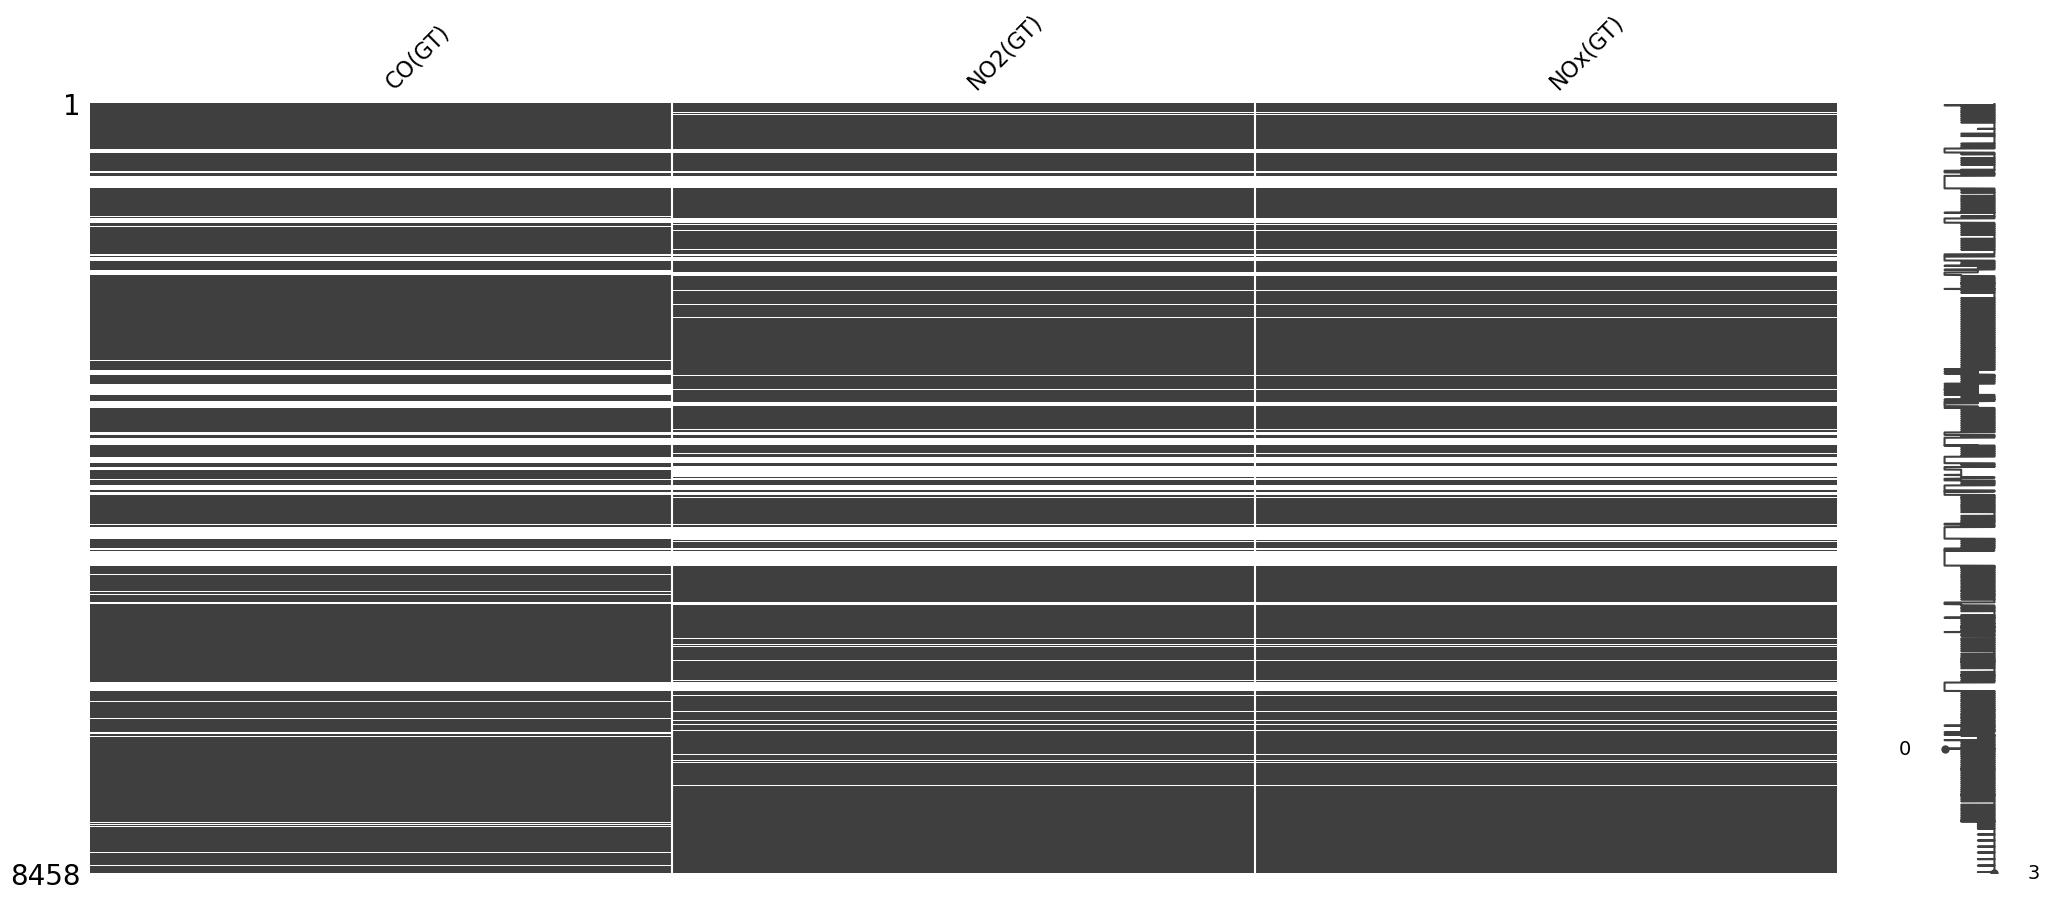

<Figure size 900x600 with 0 Axes>

In [21]:
import missingno as msno


columns_of_interest = ['CO(GT)', 'NO2(GT)', 'NOx(GT)']
subset_airqual_df_filtered = airqual_df_filtered[columns_of_interest]

msno.matrix(subset_airqual_df_filtered)
plt.figure(figsize=(9, 6))
# plt.savefig('missing_no.png', dpi=300)
plt.show()

The plot shows that there are common records for the missing values for `CO(GT)`, `NO2(GT)`, `NOx(GT)`. Given this information, let's get an idea on how many of these common records there are and what are these common records. Since there is a high possibilty that the number of missing records for the three columns are not the same, we will extend the list by adding `NaN` values to equalize the number of records for the three columns. 

In [22]:
missing_co_gt_indices = airqual_df_filtered[airqual_df_filtered['CO(GT)'].isnull(
)].index.astype(int).tolist()
missing_no2_gt_indices = airqual_df_filtered[airqual_df_filtered['NO2(GT)'].isnull(
)].index.astype(int).tolist()
missing_nox_gt_indices = airqual_df_filtered[airqual_df_filtered['NOx(GT)'].isnull(
)].index.astype(int).tolist()

common_missing_indices = list(set(missing_co_gt_indices) & set(
    missing_no2_gt_indices) & set(missing_nox_gt_indices))

max_length = max(len(missing_co_gt_indices), len(
    missing_no2_gt_indices), len(missing_nox_gt_indices))

missing_co_gt_indices.extend(
    [None] * (max_length - len(missing_co_gt_indices)))
missing_no2_gt_indices.extend(
    [None] * (max_length - len(missing_no2_gt_indices)))
missing_nox_gt_indices.extend(
    [None] * (max_length - len(missing_nox_gt_indices)))

missing_indices_df = pd.DataFrame({
    'Missing CO(GT)': missing_co_gt_indices,
    'Missing NO2(GT)': missing_no2_gt_indices,
    'Missing NOx(GT)': missing_nox_gt_indices
})

print(
    f"Count of common missing indices for CO(GT), NO2(GT), and NOx(GT): {len(common_missing_indices)}")

missing_indices_df

Count of common missing indices for CO(GT), NO2(GT), and NOx(GT): 1163


Missing CO(GT)  Missing NO2(GT)  Missing NOx(GT)
0                 39             39.0             39.0
1                 58             57.0             57.0
2                 82             81.0             81.0
3                106            105.0            105.0
4                130            129.0            129.0
...              ...              ...              ...
1576            9058              NaN              NaN
1577            9130              NaN              NaN
1578            9202              NaN              NaN
1579            9274              NaN              NaN
1580            9346              NaN              NaN

[1581 rows x 3 columns]

A significant number of the records missing values (`1,163 out of 1,581`) are common between the three features. These common missing records were dropped.

In [23]:
airqual_df_filtered = airqual_df_filtered.drop(common_missing_indices)
airqual_df_filtered

Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
0     10/03/2004  18.00.00     2.6       1360.0      11.9         1046.0   
1     10/03/2004  19.00.00     2.0       1292.0       9.4          955.0   
2     10/03/2004  20.00.00     2.2       1402.0       9.0          939.0   
3     10/03/2004  21.00.00     2.2       1376.0       9.2          948.0   
4     10/03/2004  22.00.00     1.6       1272.0       6.5          836.0   
...          ...       ...     ...          ...       ...            ...   
9352  04/04/2005  10.00.00     3.1       1314.0      13.5         1101.0   
9353  04/04/2005  11.00.00     2.4       1163.0      11.4         1027.0   
9354  04/04/2005  12.00.00     2.4       1142.0      12.4         1063.0   
9355  04/04/2005  13.00.00     2.1       1003.0       9.5          961.0   
9356  04/04/2005  14.00.00     2.2       1071.0      11.9         1047.0   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0       166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1       103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2       131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3       172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4       131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   
...       ...           ...      ...           ...          ...   ...   ...   
9352    472.0         539.0    190.0        1374.0       1729.0  21.9  29.3   
9353    353.0         604.0    179.0        1264.0       1269.0  24.3  23.7   
9354    293.0         603.0    175.0        1241.0       1092.0  26.9  18.3   
9355    235.0         702.0    156.0        1041.0        770.0  28.3  13.5   
9356    265.0         654.0    168.0        1129.0        816.0  28.5  13.1   

          AH  
0     0.7578  
1     0.7255  
2     0.7502  
3     0.7867  
4     0.7888  
...      ...  
9352  0.7568  
9353  0.7119  
9354  0.6406  
9355  0.5139  
9356  0.5028  

[7295 rows x 14 columns]

Below are the basic statistics, information and `%NaN` of the dataset at this point.

In [24]:
airqual_df_filtered.describe()

CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  6877.000000  7295.000000  7295.000000    7295.000000  6913.000000   
mean      1.921914  1079.272790     9.110144     913.633585   208.739621   
std       1.089247   179.521163     5.705067     220.597597   147.348310   
min       0.100000   667.000000     0.500000     440.000000     2.000000   
25%       1.100000   944.000000     4.600000     743.000000    96.000000   
50%       1.700000  1053.000000     7.900000     895.000000   168.000000   
75%       2.600000  1191.500000    12.600000    1069.000000   286.000000   
max       5.600000  1667.000000    28.300000    1511.000000   668.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   7295.000000  6910.000000   7295.000000  7295.000000  7295.000000   
mean     833.064016   108.259768   1428.046333   987.549692    18.460480   
std      202.919297    41.717354    320.252510   330.781839     8.926272   
min      360.000000     2.000000    601.000000   280.000000    -1.900000   
25%      687.000000    77.000000   1209.000000   747.000000    12.000000   
50%      816.000000   106.000000   1455.000000   942.000000    18.400000   
75%      954.000000   134.000000   1644.000000  1205.000000    24.500000   
max     1435.000000   238.000000   2337.000000  2030.000000    43.100000   

                RH           AH  
count  7295.000000  7295.000000  
mean     48.259260     1.011154  
std      17.238437     0.397178  
min       9.200000     0.184700  
25%      34.900000     0.732600  
50%      48.800000     1.003100  
75%      61.300000     1.278650  
max      88.700000     2.171900

In [25]:
airqual_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7295 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7295 non-null   object 
 1   Time           7295 non-null   object 
 2   CO(GT)         6877 non-null   float64
 3   PT08.S1(CO)    7295 non-null   float64
 4   C6H6(GT)       7295 non-null   float64
 5   PT08.S2(NMHC)  7295 non-null   float64
 6   NOx(GT)        6913 non-null   float64
 7   PT08.S3(NOx)   7295 non-null   float64
 8   NO2(GT)        6910 non-null   float64
 9   PT08.S4(NO2)   7295 non-null   float64
 10  PT08.S5(O3)    7295 non-null   float64
 11  T              7295 non-null   float64
 12  RH             7295 non-null   float64
 13  AH             7295 non-null   float64
dtypes: float64(12), object(2)
memory usage: 854.9+ KB


In [26]:
df_airqual_percentage_NaNs = (airqual_df_filtered.isna().sum(
) / len(airqual_df_filtered) * 100).to_frame(name='%_NaN').sort_values(
    '%_NaN', ascending=False)
df_airqual_percentage_NaNs

%_NaN
CO(GT)         5.729952
NO2(GT)        5.277587
NOx(GT)        5.236463
Date           0.000000
Time           0.000000
PT08.S1(CO)    0.000000
C6H6(GT)       0.000000
PT08.S2(NMHC)  0.000000
PT08.S3(NOx)   0.000000
PT08.S4(NO2)   0.000000
PT08.S5(O3)    0.000000
T              0.000000
RH             0.000000
AH             0.000000

Features `CO(GT)`, `NO2(GT)`, `NOx(GT)` now have lower percentages of `NaN`. Median imputation was then used to minimize the effect of outliers. 

In [27]:
median_imputer = SimpleImputer(strategy='median')

for column in ['CO(GT)', 'NO2(GT)', 'NOx(GT)']:
    airqual_df_filtered[column] = median_imputer.fit_transform(
        airqual_df_filtered[[column]])

airqual_df_filtered

Date      Time  CO(GT)  PT08.S1(CO)  C6H6(GT)  PT08.S2(NMHC)  \
0     10/03/2004  18.00.00     2.6       1360.0      11.9         1046.0   
1     10/03/2004  19.00.00     2.0       1292.0       9.4          955.0   
2     10/03/2004  20.00.00     2.2       1402.0       9.0          939.0   
3     10/03/2004  21.00.00     2.2       1376.0       9.2          948.0   
4     10/03/2004  22.00.00     1.6       1272.0       6.5          836.0   
...          ...       ...     ...          ...       ...            ...   
9352  04/04/2005  10.00.00     3.1       1314.0      13.5         1101.0   
9353  04/04/2005  11.00.00     2.4       1163.0      11.4         1027.0   
9354  04/04/2005  12.00.00     2.4       1142.0      12.4         1063.0   
9355  04/04/2005  13.00.00     2.1       1003.0       9.5          961.0   
9356  04/04/2005  14.00.00     2.2       1071.0      11.9         1047.0   

      NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)     T    RH  \
0       166.0        1056.0    113.0        1692.0       1268.0  13.6  48.9   
1       103.0        1174.0     92.0        1559.0        972.0  13.3  47.7   
2       131.0        1140.0    114.0        1555.0       1074.0  11.9  54.0   
3       172.0        1092.0    122.0        1584.0       1203.0  11.0  60.0   
4       131.0        1205.0    116.0        1490.0       1110.0  11.2  59.6   
...       ...           ...      ...           ...          ...   ...   ...   
9352    472.0         539.0    190.0        1374.0       1729.0  21.9  29.3   
9353    353.0         604.0    179.0        1264.0       1269.0  24.3  23.7   
9354    293.0         603.0    175.0        1241.0       1092.0  26.9  18.3   
9355    235.0         702.0    156.0        1041.0        770.0  28.3  13.5   
9356    265.0         654.0    168.0        1129.0        816.0  28.5  13.1   

          AH  
0     0.7578  
1     0.7255  
2     0.7502  
3     0.7867  
4     0.7888  
...      ...  
9352  0.7568  
9353  0.7119  
9354  0.6406  
9355  0.5139  
9356  0.5028  

[7295 rows x 14 columns]

Below are the basic statistics, information and `%NaN` of the dataset at this point.

In [28]:
airqual_df_filtered.describe()

CO(GT)  PT08.S1(CO)     C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  \
count  7295.000000  7295.000000  7295.000000    7295.000000  7295.000000   
mean      1.909198  1079.272790     9.110144     913.633585   206.606306   
std       1.058832   179.521163     5.705067     220.597597   143.724818   
min       0.100000   667.000000     0.500000     440.000000     2.000000   
25%       1.100000   944.000000     4.600000     743.000000   100.000000   
50%       1.700000  1053.000000     7.900000     895.000000   168.000000   
75%       2.500000  1191.500000    12.600000    1069.000000   277.000000   
max       5.600000  1667.000000    28.300000    1511.000000   668.000000   

       PT08.S3(NOx)      NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)            T  \
count   7295.000000  7295.000000   7295.000000  7295.000000  7295.000000   
mean     833.064016   108.140507   1428.046333   987.549692    18.460480   
std      202.919297    40.604587    320.252510   330.781839     8.926272   
min      360.000000     2.000000    601.000000   280.000000    -1.900000   
25%      687.000000    79.000000   1209.000000   747.000000    12.000000   
50%      816.000000   106.000000   1455.000000   942.000000    18.400000   
75%      954.000000   132.000000   1644.000000  1205.000000    24.500000   
max     1435.000000   238.000000   2337.000000  2030.000000    43.100000   

                RH           AH  
count  7295.000000  7295.000000  
mean     48.259260     1.011154  
std      17.238437     0.397178  
min       9.200000     0.184700  
25%      34.900000     0.732600  
50%      48.800000     1.003100  
75%      61.300000     1.278650  
max      88.700000     2.171900

In [29]:
airqual_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7295 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7295 non-null   object 
 1   Time           7295 non-null   object 
 2   CO(GT)         7295 non-null   float64
 3   PT08.S1(CO)    7295 non-null   float64
 4   C6H6(GT)       7295 non-null   float64
 5   PT08.S2(NMHC)  7295 non-null   float64
 6   NOx(GT)        7295 non-null   float64
 7   PT08.S3(NOx)   7295 non-null   float64
 8   NO2(GT)        7295 non-null   float64
 9   PT08.S4(NO2)   7295 non-null   float64
 10  PT08.S5(O3)    7295 non-null   float64
 11  T              7295 non-null   float64
 12  RH             7295 non-null   float64
 13  AH             7295 non-null   float64
dtypes: float64(12), object(2)
memory usage: 854.9+ KB


Below is a boxplot visualization of the dataset thus far.

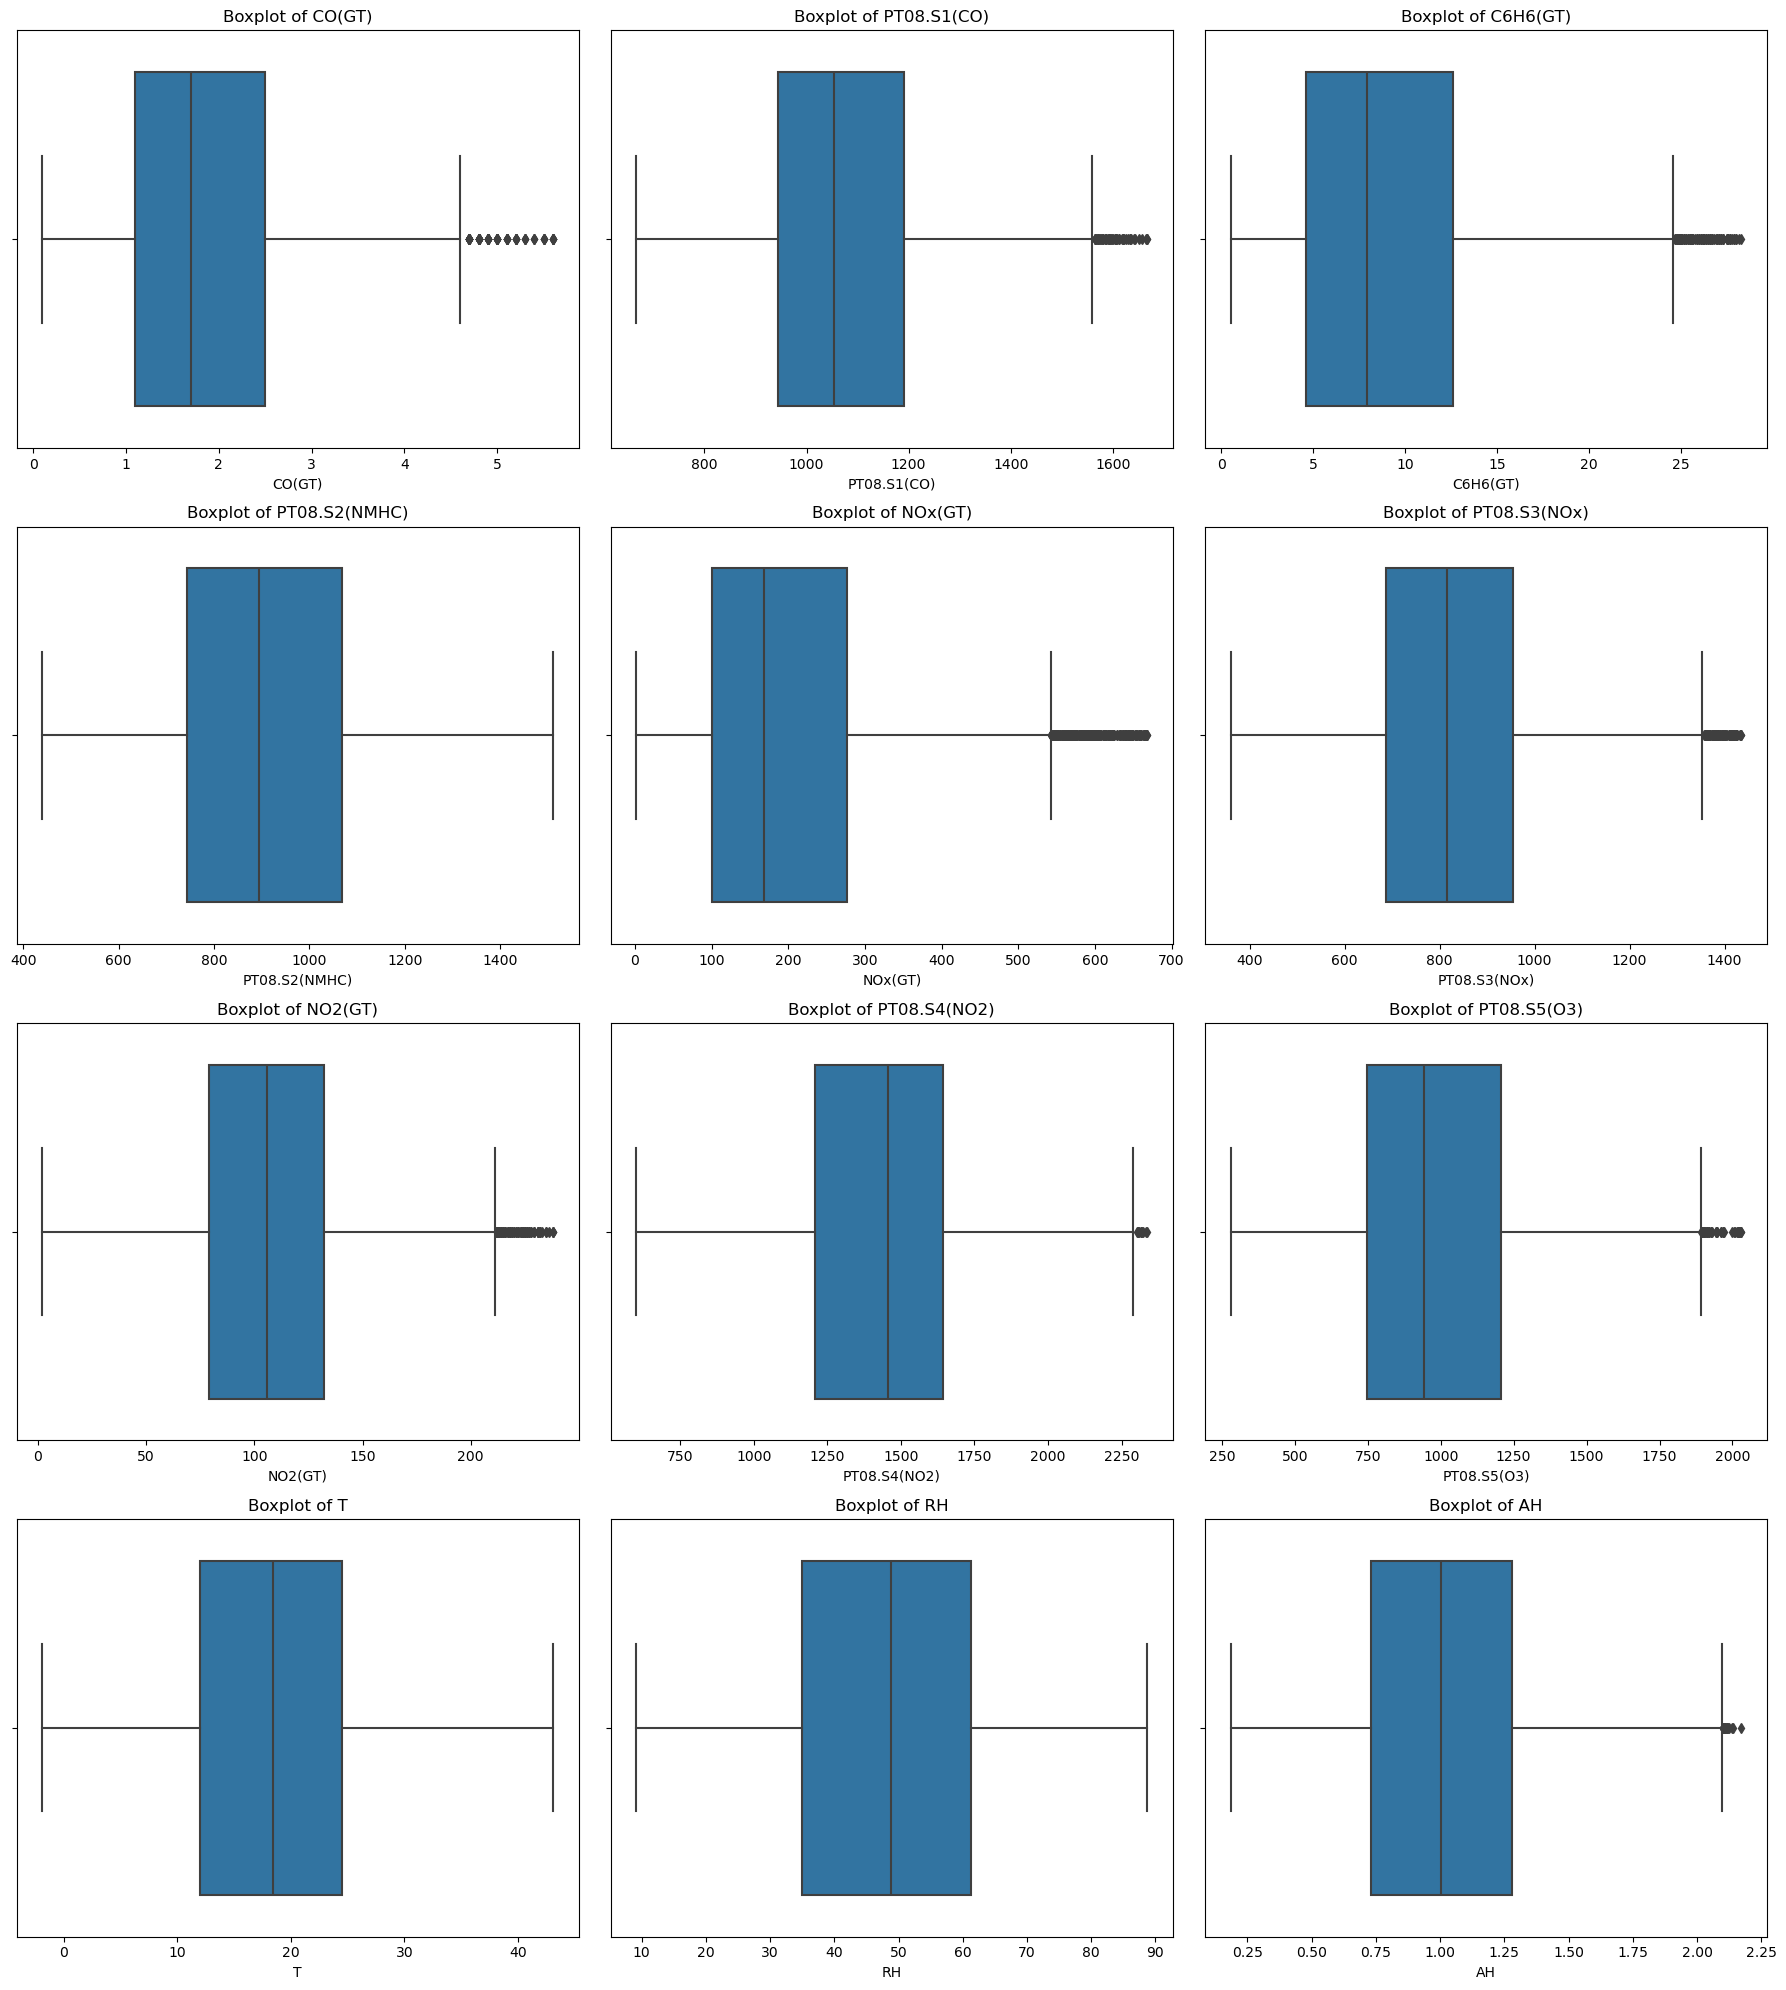

In [30]:
numerical_columns = airqual_df_filtered.select_dtypes(
    include=[np.number]).columns

n_cols = 3
n_rows = len(numerical_columns) // n_cols + (
    len(numerical_columns) % n_cols > 0)

plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=airqual_df_filtered[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
# plt.savefig('boxplots_intiial.png', dpi=300)
plt.show()

The boxplots shows that there are still outliers for `CO(GT)`, `C6H6(GT)`, `NOx(GT)` and `NO2(GT)`. A look at the other features show that, just like with `NMHC(GT)`,  proxies for these four features are available, namely: `PT08.S1(CO)` for `CO(GT)`, `PT08.S2(NMHC)` for `C6H6(GT)`, `PT08.S3(NOx)` for `NOx(GT)`, `PT08.S4(NO2)` and `NO2(GT)`. Lastly, no time-series analysis is to be performed so we can drop `Date` and `Time` columns together these four features.

In [31]:
airqual_df_filtered.drop(['Date'], axis=1, inplace=True, errors='ignore')
airqual_df_filtered.drop(['Time'], axis=1, inplace=True, errors='ignore')
airqual_df_filtered.drop(['CO(GT)'], axis=1, inplace=True, errors='ignore')
airqual_df_filtered.drop(['C6H6(GT)'], axis=1, inplace=True, errors='ignore')
airqual_df_filtered.drop(['NOx(GT)'], axis=1, inplace=True, errors='ignore')
airqual_df_filtered.drop(['NO2(GT)'], axis=1, inplace=True, errors='ignore')
airqual_df_filtered

PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)  \
0          1360.0         1046.0        1056.0        1692.0       1268.0   
1          1292.0          955.0        1174.0        1559.0        972.0   
2          1402.0          939.0        1140.0        1555.0       1074.0   
3          1376.0          948.0        1092.0        1584.0       1203.0   
4          1272.0          836.0        1205.0        1490.0       1110.0   
...           ...            ...           ...           ...          ...   
9352       1314.0         1101.0         539.0        1374.0       1729.0   
9353       1163.0         1027.0         604.0        1264.0       1269.0   
9354       1142.0         1063.0         603.0        1241.0       1092.0   
9355       1003.0          961.0         702.0        1041.0        770.0   
9356       1071.0         1047.0         654.0        1129.0        816.0   

         T    RH      AH  
0     13.6  48.9  0.7578  
1     13.3  47.7  0.7255  
2     11.9  54.0  0.7502  
3     11.0  60.0  0.7867  
4     11.2  59.6  0.7888  
...    ...   ...     ...  
9352  21.9  29.3  0.7568  
9353  24.3  23.7  0.7119  
9354  26.9  18.3  0.6406  
9355  28.3  13.5  0.5139  
9356  28.5  13.1  0.5028  

[7295 rows x 8 columns]

Below are the basic statistics, information and %NaN of the dataset at this point.

In [32]:
airqual_df_filtered.describe()

PT08.S1(CO)  PT08.S2(NMHC)  PT08.S3(NOx)  PT08.S4(NO2)  PT08.S5(O3)  \
count  7295.000000    7295.000000   7295.000000   7295.000000  7295.000000   
mean   1079.272790     913.633585    833.064016   1428.046333   987.549692   
std     179.521163     220.597597    202.919297    320.252510   330.781839   
min     667.000000     440.000000    360.000000    601.000000   280.000000   
25%     944.000000     743.000000    687.000000   1209.000000   747.000000   
50%    1053.000000     895.000000    816.000000   1455.000000   942.000000   
75%    1191.500000    1069.000000    954.000000   1644.000000  1205.000000   
max    1667.000000    1511.000000   1435.000000   2337.000000  2030.000000   

                 T           RH           AH  
count  7295.000000  7295.000000  7295.000000  
mean     18.460480    48.259260     1.011154  
std       8.926272    17.238437     0.397178  
min      -1.900000     9.200000     0.184700  
25%      12.000000    34.900000     0.732600  
50%      18.400000    48.800000     1.003100  
75%      24.500000    61.300000     1.278650  
max      43.100000    88.700000     2.171900

In [33]:
airqual_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7295 entries, 0 to 9356
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PT08.S1(CO)    7295 non-null   float64
 1   PT08.S2(NMHC)  7295 non-null   float64
 2   PT08.S3(NOx)   7295 non-null   float64
 3   PT08.S4(NO2)   7295 non-null   float64
 4   PT08.S5(O3)    7295 non-null   float64
 5   T              7295 non-null   float64
 6   RH             7295 non-null   float64
 7   AH             7295 non-null   float64
dtypes: float64(8)
memory usage: 512.9 KB


Below is a boxplot visualization of the dataset thus far.

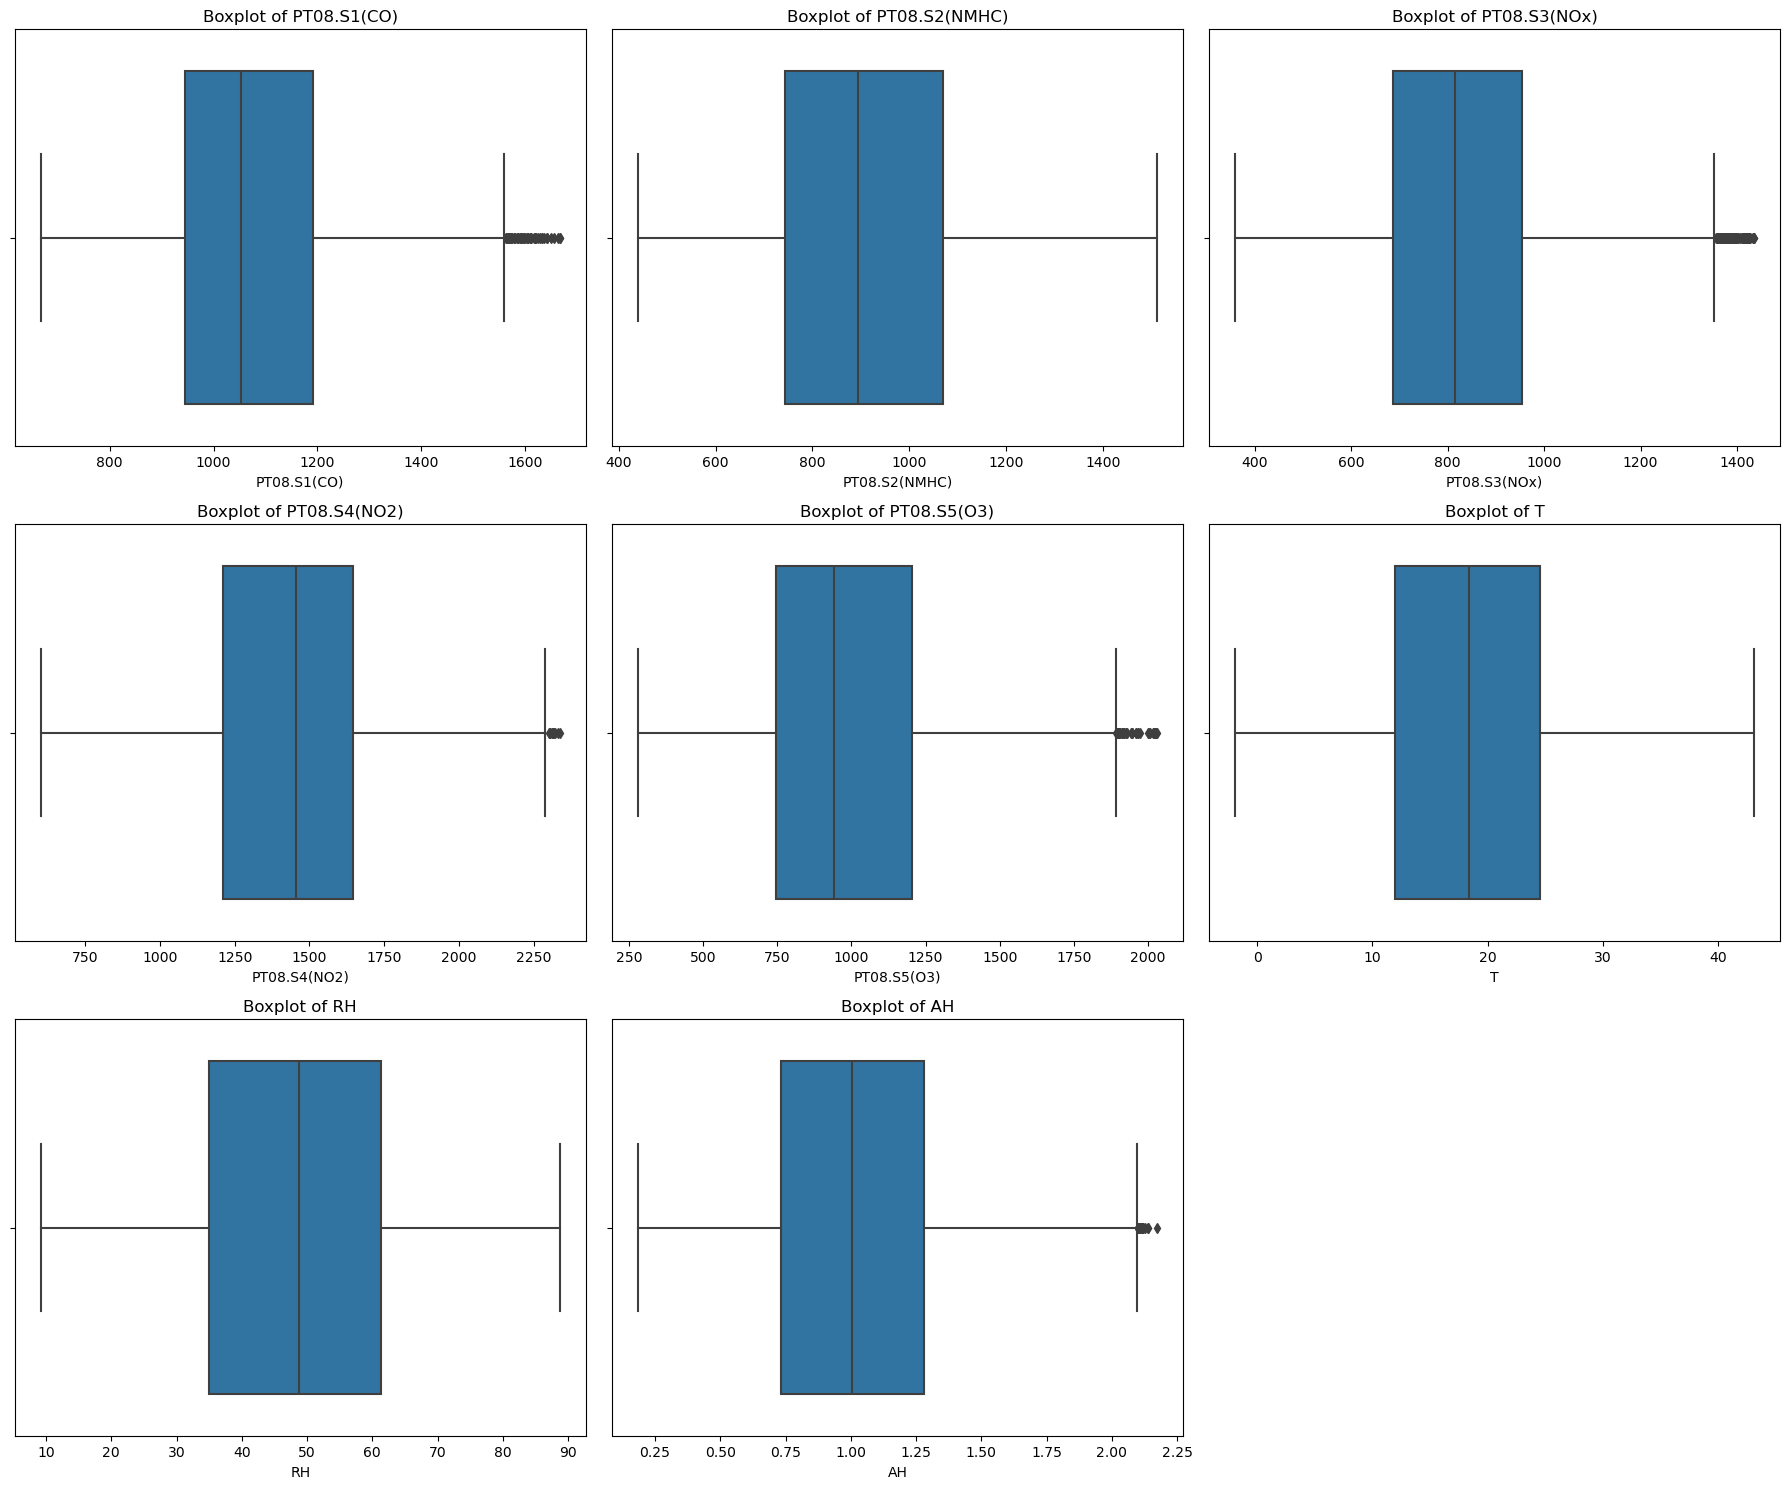

In [34]:
numerical_columns = airqual_df_filtered.select_dtypes(
    include=[np.number]).columns

n_cols = 3
n_rows = len(numerical_columns) // n_cols + (
    len(numerical_columns) % n_cols > 0)

plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=airqual_df_filtered[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
# plt.savefig('boxplots_final.png', dpi=300)
plt.show()

There are still some outliers for some of our features but for the purposes of the study, we will proceed with the use of this dataset.

-----
### Exploratory Data Analysis

Exploratory Data Analysis was performed to uncover initial insights into what the dataset has to offer.

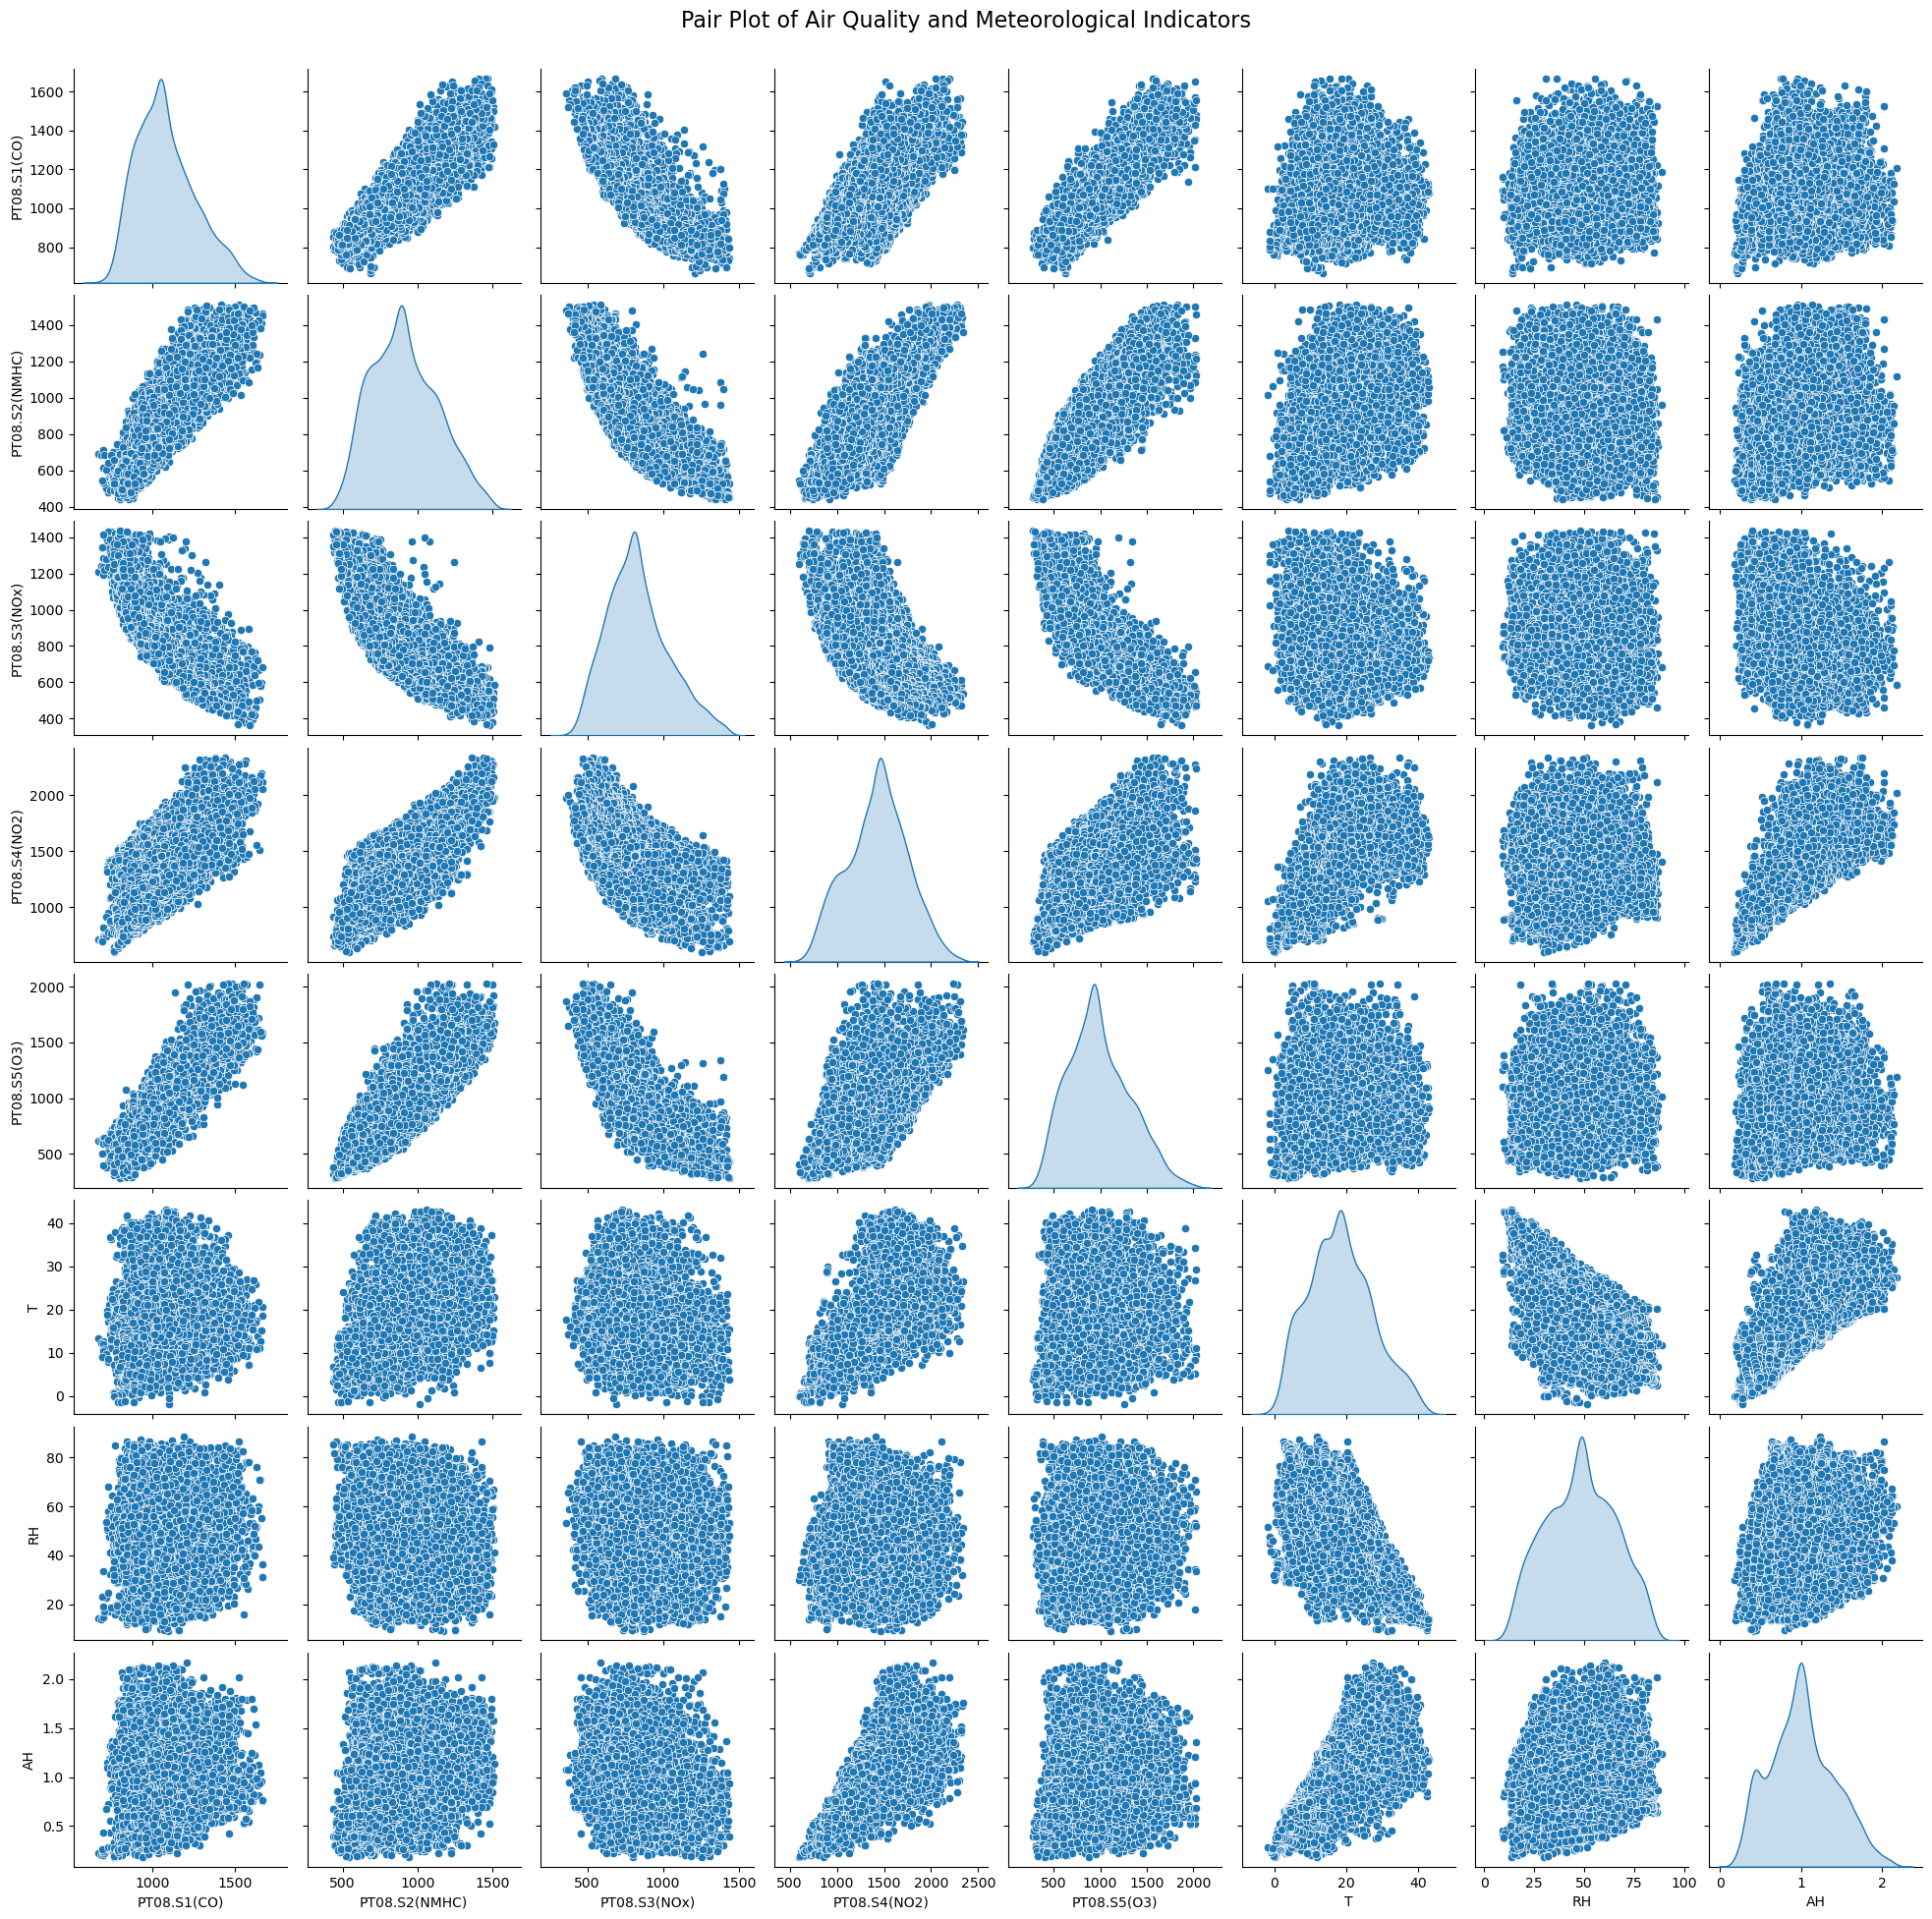

In [35]:
columns_of_interest = [
    'PT08.S1(CO)', 'PT08.S2(NMHC)',
    'PT08.S3(NOx)', 'PT08.S4(NO2)',
    'PT08.S5(O3)', 'T', 'RH', 'AH'
]

sns.pairplot(airqual_df_filtered[columns_of_interest], diag_kind='kde')

plt.subplots_adjust(top=0.95)
plt.suptitle('Pair Plot of Air Quality and Meteorological Indicators',
             fontsize=16)
# plt.savefig('pair_plots_filtered.png', dpi=300)
plt.show()

The pair plots reveal that most of the air quality features show positive correlation except for `NOx` which shows a negative correlation with the rest of the features. This is also shown in heat-map representation of the correlations.

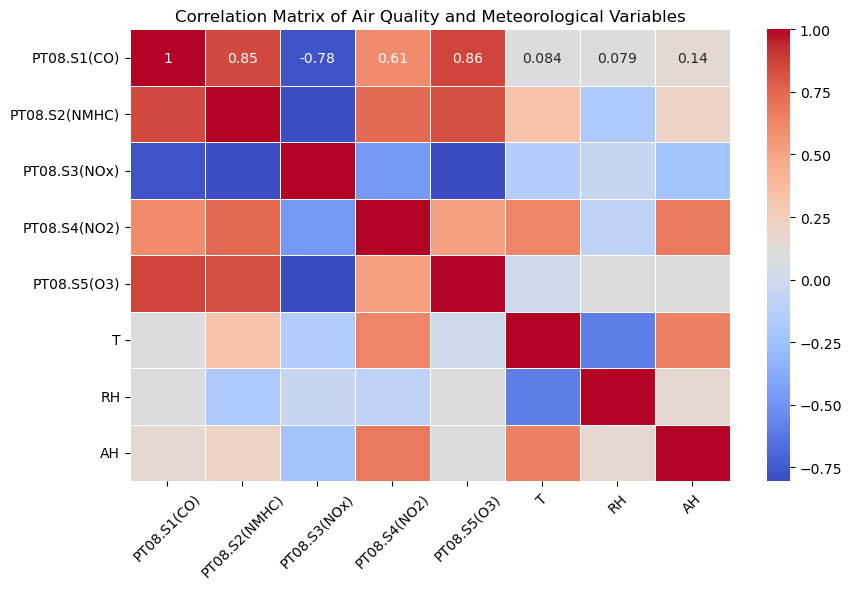

In [36]:
correlation_matrix = airqual_df_filtered.corr()

plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Air Quality and Meteorological Variables')
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('correlation_analysis.png', dpi=300)
plt.show()

-----
### MODEL ASSESSMENT, RESULTS AND DISCUSSIONS

Now that the dataset has been processed as much as possible, the ML model assessment can now be done.

At the initial stages of the study, a variation of the code that is eventually used for this study and the AutoML implementation discussed during the course was tried.  However, the initial implementation had a runtime of more than 7 hours and the identified best model did not appear to be right. In the end, the multi-model assessment framework, which had a runtime of less tha a minute, from a similar work (Murcia, V. 2022) was used for this study. 

Below are the codes for the multi-model assessment. Minor adjustment was made to reflect the suite of ML regressors discussed during the course. Additionally, analysis was limited to the five non-meteorological features, namely: `PT08.S1(CO)`, `PT08.S2(NMHC)`, `PT08.S3(NOx)`, `PT08.S4(NO2)`, `PT08.S5(O3)`.

In [37]:
def model_assess(X_train, X_test, y_train, y_test, model, title="Default"):
    start_time = time.time()  # Start time

    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    end_time = time.time()  # End time
    runtime = end_time - start_time  # Calculate runtime

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results = pd.DataFrame([title, train_mse, train_r2, test_mse, test_r2, runtime]).transpose()
    results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2', 'Runtime (s)']
    return y_train_pred, y_test_pred, results

def multi_model_assess(df, models, y_predict):
    all_model_results = []  # This will contain all model results for each dependent variable
    all_X_test = []
    all_X_train = []
    all_y_test_p = []
    all_y_train_p = []
    all_y_train = []
    # First loop will define dependent/independent variables and split data into test/training sets
    n_vars = len(y_predict)
    pbar = tqdm(range(n_vars), desc="Variable Processed", position=0, leave=True)  # Add progress bar

    for dependent in y_predict:
        model_results = []  # Array with dataframes for a given dependent variable
        # Designate independent and dependent variables
        x = df.drop([dependent], axis=1)
        y = df[dependent]
        # Split data into test and training sets
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

        # Populate the array of observed values for the dependent variable
        all_y_train.append(y_train)

        # Process each of the desired models
        for model, model_name in models:
            y_train_pred, y_test_pred, results = model_assess(X_train, X_test, y_train, y_test, model, title=model_name)

            model_results.append(results)
            all_X_test.append(X_test)
            all_X_train.append(X_train)
            all_y_test_p.append(y_test_pred)
            all_y_train_p.append(y_train_pred)

        all_model_results.append(model_results)
        pbar.update(1)
        pbar.refresh()

    pbar.close()
    return all_model_results, all_X_test, all_X_train, all_y_test_p, all_y_train_p, all_y_train

In [38]:
lr = LinearRegression()
la = Lasso(alpha=0.1)
ri = Ridge(alpha=0.1)
rf = RandomForestRegressor(n_estimators=100, max_depth=3, random_state=1337)
gb = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=1337)
kn = KNeighborsRegressor()
sv = SVR()

models = [(lr, 'Linear Regression'),
          (la, 'Lasso Regression'),
          (ri, 'Ridge Regression'),
          (rf, 'Random Forest'),
          (gb, 'Gradient Boosting'),
          (kn, 'K-Neighbors'),
          (sv, 'SVR')]

y_predict = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
             'PT08.S4(NO2)', 'PT08.S5(O3)']

all_model_results, _, _, all_y_test_p, all_y_train_p, all_y_train = multi_model_assess(airqual_df_filtered, models, y_predict)

Variable Processed: 100%|██████████| 5/5 [00:36<00:00,  7.25s/it]


Below are the results for all the models for the features `PT08.S1(CO)`, `PT08.S2(NMHC)`, `PT08.S3(NOx)`, `PT08.S4(NO2)`, `PT08.S5(O3)`

In [39]:
CO_score_df_results = pd.concat(
    all_model_results[0], ignore_index=True) \
                        .sort_values(by='Test R2',
                                     ascending=False) \
                        .reset_index(drop=True)
CO_score_df_results.index += 1
CO_score_df_results

Method Training MSE Training R2     Test MSE   Test R2  \
1  Gradient Boosting  2778.257582    0.914123  3445.268673  0.891356   
2        K-Neighbors  2379.617114    0.926445  3569.674846  0.887433   
3   Lasso Regression  5289.935561    0.836485   5566.85722  0.824453   
4   Ridge Regression  5289.307833    0.836505  5567.815488  0.824423   
5  Linear Regression  5289.307536    0.836505  5567.851162  0.824421   
6      Random Forest  6397.505809     0.80225  6631.092985  0.790893   
7                SVR  6478.035239     0.79976  6695.687008  0.788856   

  Runtime (s)  
1    1.094442  
2    0.054219  
3    0.013472  
4    0.004466  
5    0.005981  
6    0.865003  
7    5.046717

In [40]:
NMHC_score_df_results = pd.concat(
    all_model_results[0], ignore_index=True) \
                        .sort_values(by='Test R2',
                                     ascending=False) \
                        .reset_index(drop=True)
NMHC_score_df_results.index += 1
NMHC_score_df_results

Method Training MSE Training R2     Test MSE   Test R2  \
1  Gradient Boosting  2778.257582    0.914123  3445.268673  0.891356   
2        K-Neighbors  2379.617114    0.926445  3569.674846  0.887433   
3   Lasso Regression  5289.935561    0.836485   5566.85722  0.824453   
4   Ridge Regression  5289.307833    0.836505  5567.815488  0.824423   
5  Linear Regression  5289.307536    0.836505  5567.851162  0.824421   
6      Random Forest  6397.505809     0.80225  6631.092985  0.790893   
7                SVR  6478.035239     0.79976  6695.687008  0.788856   

  Runtime (s)  
1    1.094442  
2    0.054219  
3    0.013472  
4    0.004466  
5    0.005981  
6    0.865003  
7    5.046717

In [41]:
NOx_score_df_results = pd.concat(
    all_model_results[0], ignore_index=True) \
                        .sort_values(by='Test R2',
                                     ascending=False) \
                        .reset_index(drop=True)
NOx_score_df_results.index += 1
NOx_score_df_results

Method Training MSE Training R2     Test MSE   Test R2  \
1  Gradient Boosting  2778.257582    0.914123  3445.268673  0.891356   
2        K-Neighbors  2379.617114    0.926445  3569.674846  0.887433   
3   Lasso Regression  5289.935561    0.836485   5566.85722  0.824453   
4   Ridge Regression  5289.307833    0.836505  5567.815488  0.824423   
5  Linear Regression  5289.307536    0.836505  5567.851162  0.824421   
6      Random Forest  6397.505809     0.80225  6631.092985  0.790893   
7                SVR  6478.035239     0.79976  6695.687008  0.788856   

  Runtime (s)  
1    1.094442  
2    0.054219  
3    0.013472  
4    0.004466  
5    0.005981  
6    0.865003  
7    5.046717

In [42]:
NO2_score_df_results = pd.concat(
    all_model_results[0], ignore_index=True) \
                        .sort_values(by='Test R2',
                                     ascending=False) \
                        .reset_index(drop=True)
NO2_score_df_results.index += 1
NO2_score_df_results

Method Training MSE Training R2     Test MSE   Test R2  \
1  Gradient Boosting  2778.257582    0.914123  3445.268673  0.891356   
2        K-Neighbors  2379.617114    0.926445  3569.674846  0.887433   
3   Lasso Regression  5289.935561    0.836485   5566.85722  0.824453   
4   Ridge Regression  5289.307833    0.836505  5567.815488  0.824423   
5  Linear Regression  5289.307536    0.836505  5567.851162  0.824421   
6      Random Forest  6397.505809     0.80225  6631.092985  0.790893   
7                SVR  6478.035239     0.79976  6695.687008  0.788856   

  Runtime (s)  
1    1.094442  
2    0.054219  
3    0.013472  
4    0.004466  
5    0.005981  
6    0.865003  
7    5.046717

In [43]:
O3_score_df_results = pd.concat(
    all_model_results[0], ignore_index=True) \
                        .sort_values(by='Test R2',
                                     ascending=False) \
                        .reset_index(drop=True)
O3_score_df_results.index += 1
O3_score_df_results

Method Training MSE Training R2     Test MSE   Test R2  \
1  Gradient Boosting  2778.257582    0.914123  3445.268673  0.891356   
2        K-Neighbors  2379.617114    0.926445  3569.674846  0.887433   
3   Lasso Regression  5289.935561    0.836485   5566.85722  0.824453   
4   Ridge Regression  5289.307833    0.836505  5567.815488  0.824423   
5  Linear Regression  5289.307536    0.836505  5567.851162  0.824421   
6      Random Forest  6397.505809     0.80225  6631.092985  0.790893   
7                SVR  6478.035239     0.79976  6695.687008  0.788856   

  Runtime (s)  
1    1.094442  
2    0.054219  
3    0.013472  
4    0.004466  
5    0.005981  
6    0.865003  
7    5.046717

The results of the model assessment show that `Gradient Boosting Method` consistently  outperformed the other models with `&R^2&` Score of `0.900026 - 0.947633`. Although the runtime of the model has the highest among models, from `1.086312` seconds to `1.158631` seconds, the 1s runtime is still manageable. The analysis going forward will use the Gradient Boosting Method as the model of choice.

**Hypertune Model**

Now that `Gradient Boosting Method` has been selected as the model to use, fine-tuning of the model using `GridSearch` is done. This allows the identification of the best hyperparameter values to use.

Below are the functions that we will be using for this part of the analysis.

In [44]:
def tune_hyperparameters(df, feature):
    """
    Tune hyperparameters for GradientBoostingRegressor for a given
    target feature using GridSearchCV.

    Parameters:
    - df: DataFrame containing the features and target.
    - feature: The name of the target feature for which to tune the model.

    Returns:
    - A tuple containing the best parameters and the best score.
    """

    param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 4, 5],
        'min_samples_split': [2, 3],
        'min_samples_leaf': [1, 2]
    }

    X = df.drop([feature], axis=1)
    y = df[feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=1337)

    gb = GradientBoostingRegressor(random_state=1337)
    grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5,
                               scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best parameters and score
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    return best_params, best_score

In [45]:
def train_and_evaluate(df, feature, best_params):
    """
    Train GradientBoostingRegressor with the best hyperparameters
    and evaluate it on the test set.

    Parameters:
    - df: DataFrame containing the features and target.
    - feature: The name of the target feature.
    - best_params: The best hyperparameters found via GridSearchCV.

    Returns:
    - The trained model and the R^2 score on the test set.
    """

    # Prepare Data
    X = df.drop([feature], axis=1)
    y = df[feature]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=1337)

    # Initialize and train the model
    model = GradientBoostingRegressor(random_state=1337, **best_params)
    model.fit(X_train, y_train)

    # Make predictions and evaluate
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)

    return model, score

In addition to finding the best parameters, additional analysis was performed on how the predicted levels of the model performed against the measured levels of the features.

**Comparison of Measured and Predicted Levels**

Below is the plot of the resulting from running the model to make predictions and comparing them to the measured levels.

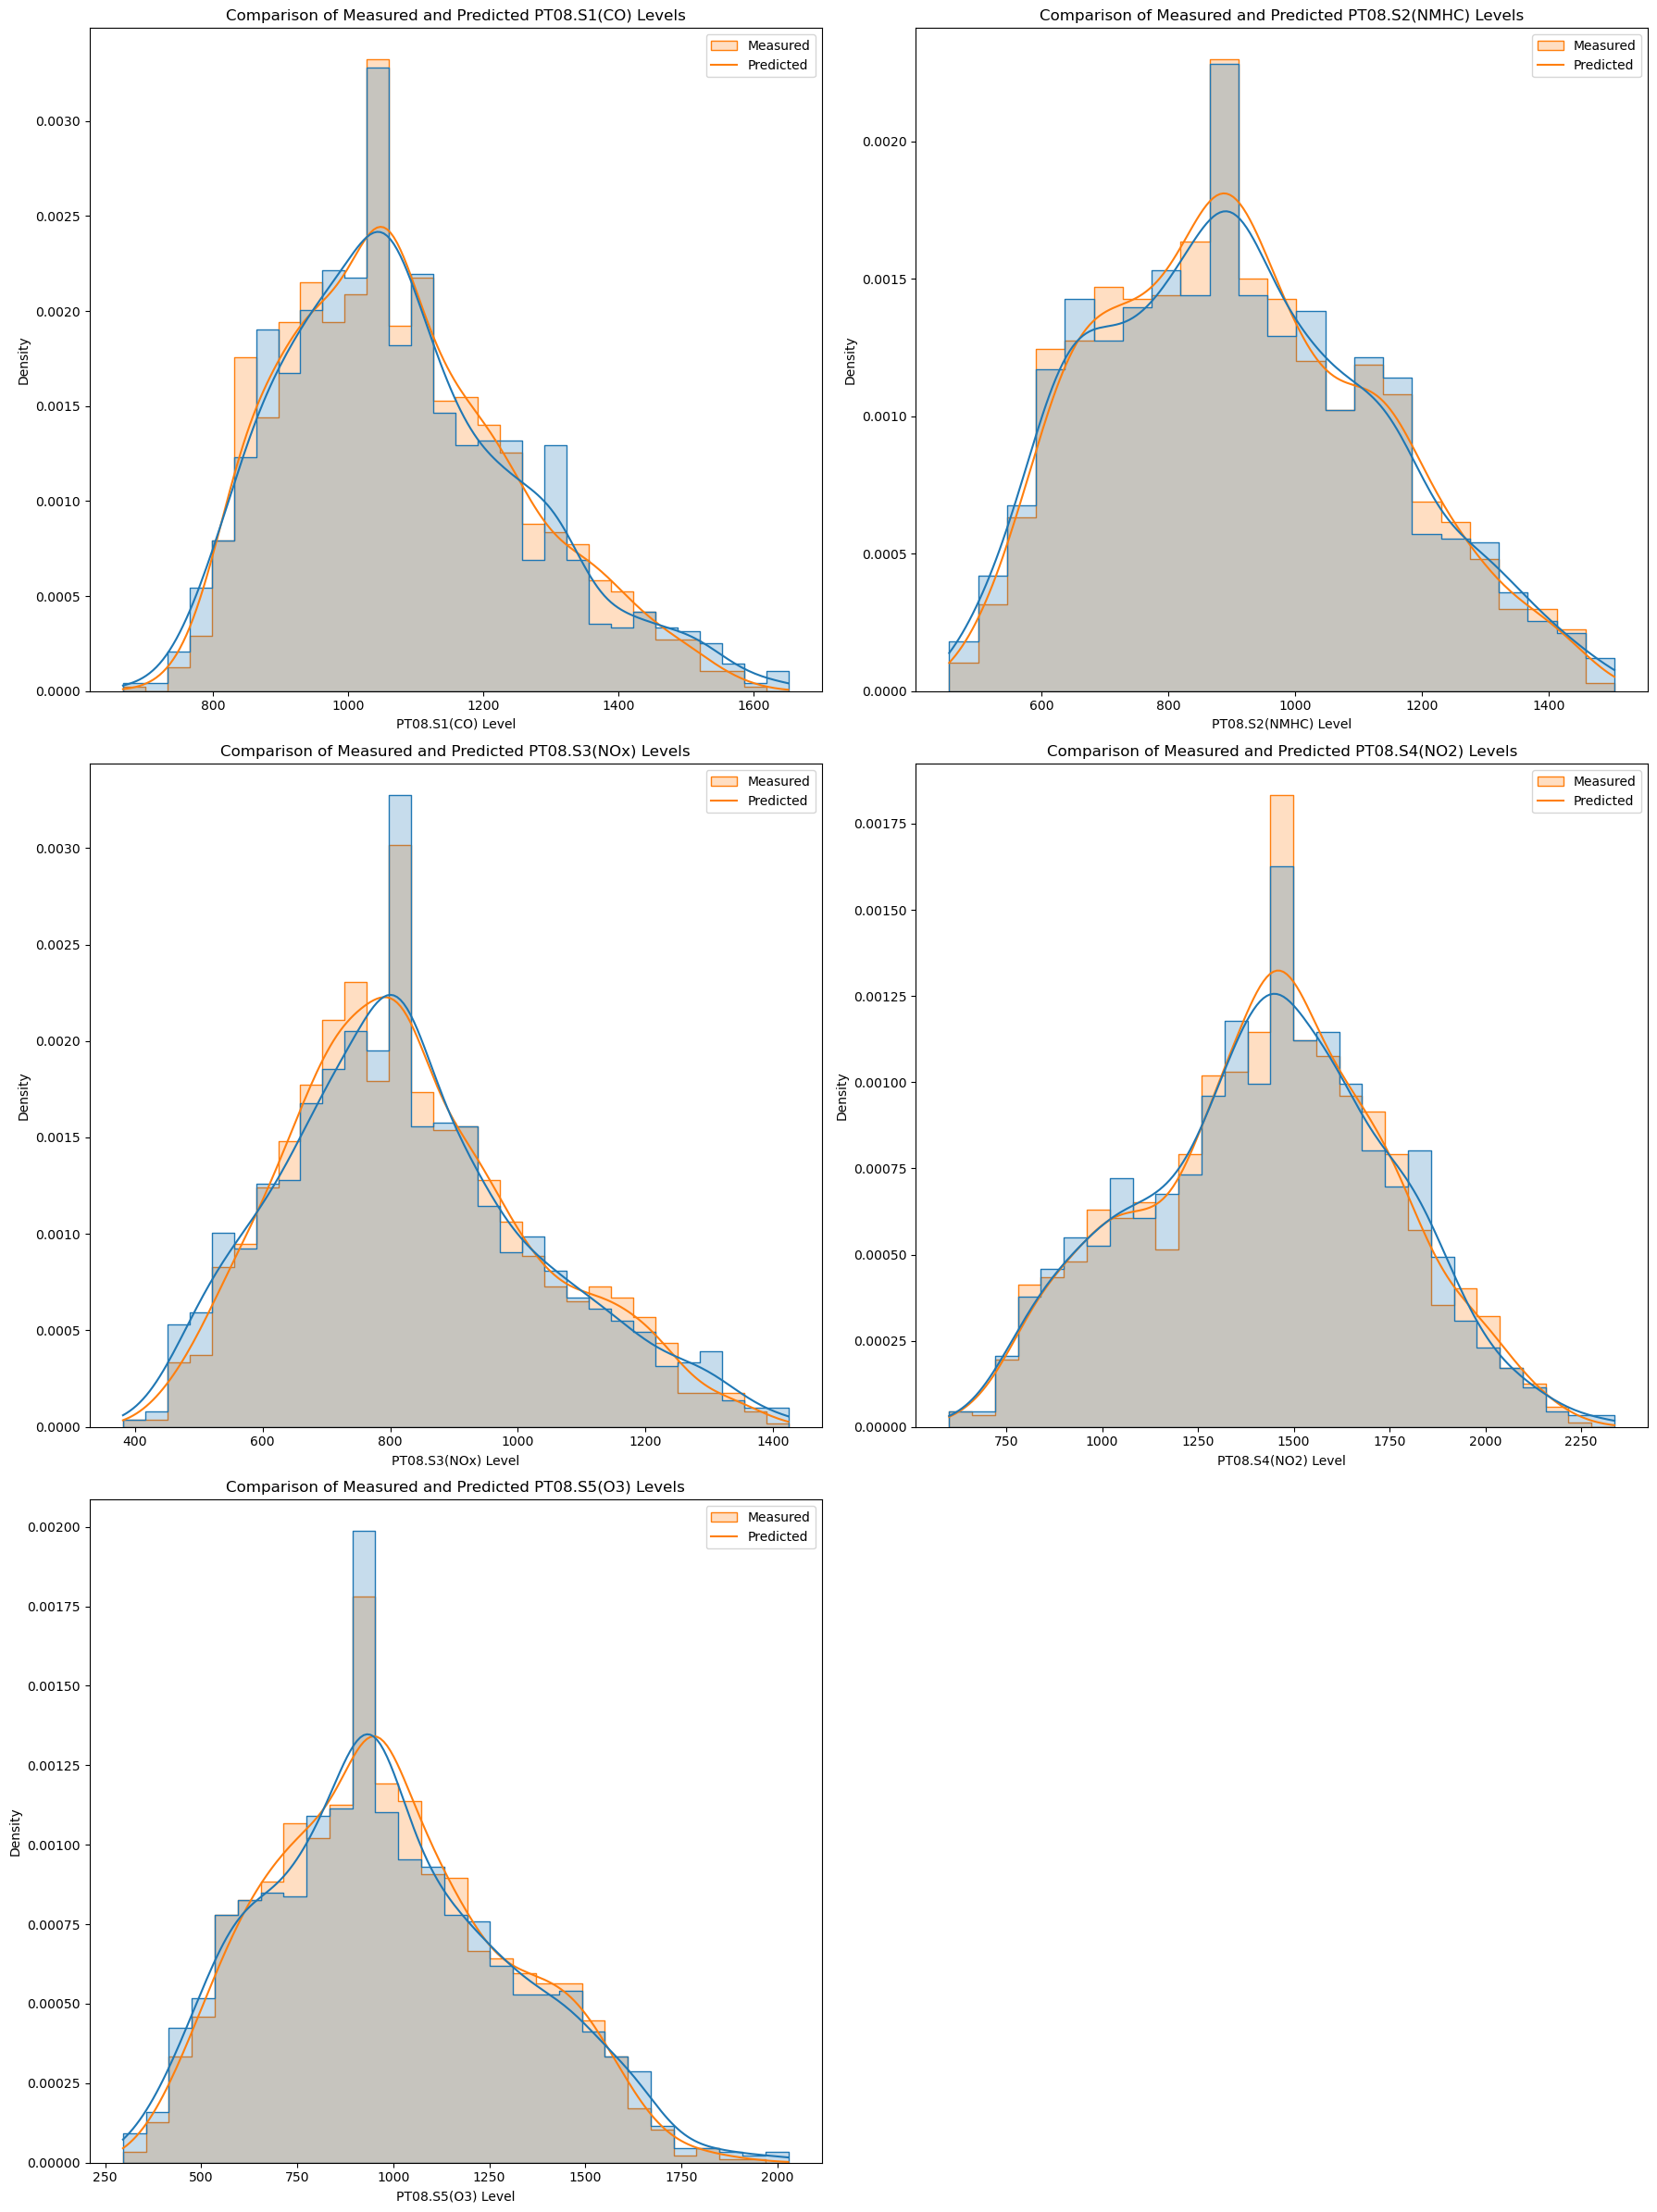

In [46]:
# List of features to process
features = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
            'PT08.S4(NO2)', 'PT08.S5(O3)']

fig, axs = plt.subplots(3, 2, figsize=(18, 24))
axs = axs.flatten()

for i, feature in enumerate(features):
    best_params, best_score = tune_hyperparameters(
        airqual_df_filtered, feature)
    model, score = train_and_evaluate(
        airqual_df_filtered, feature, best_params)

    # Splitting data and making predictions
    X_train, X_test, y_train, y_test = train_test_split(
        airqual_df_filtered.drop([feature], axis=1),
        airqual_df_filtered[feature], test_size=0.2, random_state=1337)
    predictions = model.predict(X_test)

    # Create a DataFrame for plotting
    final = pd.DataFrame({'Measured': y_test, 'Predicted': predictions})

    # Plotting on the ith subplot
    sns.histplot(final, kde=True, element="step", stat="density",
                 common_norm=False, ax=axs[i])
    axs[i].set_title(f'Comparison of Measured and Predicted {feature} Levels')
    axs[i].set_xlabel(f'{feature} Level')
    axs[i].set_ylabel('Density')
    axs[i].legend(labels=['Measured', 'Predicted'])


if len(features) % 2 != 0:
    fig.delaxes(axs[-1])

plt.tight_layout()
# plt.savefig('comparison_measured_predicted_levels.png', dpi=300)
plt.show()

Below are the insights that can be gleamed from the results.

1. **PT08.S1(CO)**: 
- The predicted and measured distributions are close.
- There is a slight discrepancy in the tails.
- The model performed well for central values but less for the extremes.

2. **PT08.S2(NMHC)**:
- The predicted and measured distributions are close.
- Deviation in the upper tail.

3. **PT08.S3(NOx)**:
- Vsible difference between the measured and predicted distributions.
- The model did not capture higher values as accurately.

4. **PT08.S4(NO2)**:
- The overlap is quite good, but with sharper peak for the predicted distribution.
- Possible overfitting for the most frequent values, which could be an effect of the median imputation during the data processing process.

5. **PT08.S5(O3)**: 
- Same as `T08.S4(NO2)`, the predicted values have a noticeably sharper peak, suggesting potential overfitting.

Below is the initialiation of features, optimal parameters and plot setup that will be used for the additional analysis and visualizations.

In [47]:
# List of features to process
features = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
            'PT08.S4(NO2)', 'PT08.S5(O3)']

optimal_params = {
    'PT08.S1(CO)': {'learning_rate': 0.1, 'max_depth': 5,
                    'min_samples_leaf': 1, 'min_samples_split': 2,
                    'n_estimators': 300},
    'PT08.S2(NMHC)': {'learning_rate': 0.1, 'max_depth': 5,
                      'min_samples_leaf': 1, 'min_samples_split': 3,
                      'n_estimators': 300},
    'PT08.S3(NOx)': {'learning_rate': 0.1, 'max_depth': 5,
                     'min_samples_leaf': 2, 'min_samples_split': 2,
                     'n_estimators': 300},
    'PT08.S4(NO2)': {'learning_rate': 0.1, 'max_depth': 5,
                     'min_samples_leaf': 2, 'min_samples_split': 2,
                     'n_estimators': 300},
    'PT08.S5(O3)': {'learning_rate': 0.1, 'max_depth': 5,
                    'min_samples_leaf': 2, 'min_samples_split': 2,
                    'n_estimators': 300}
}

# Subplot grid setup
n = len(features)
cols = 2  
rows = n // cols + (n % cols > 0)

**Residuals Distribution**

The first of the analysis and visualization is the residuals distribution shown below.

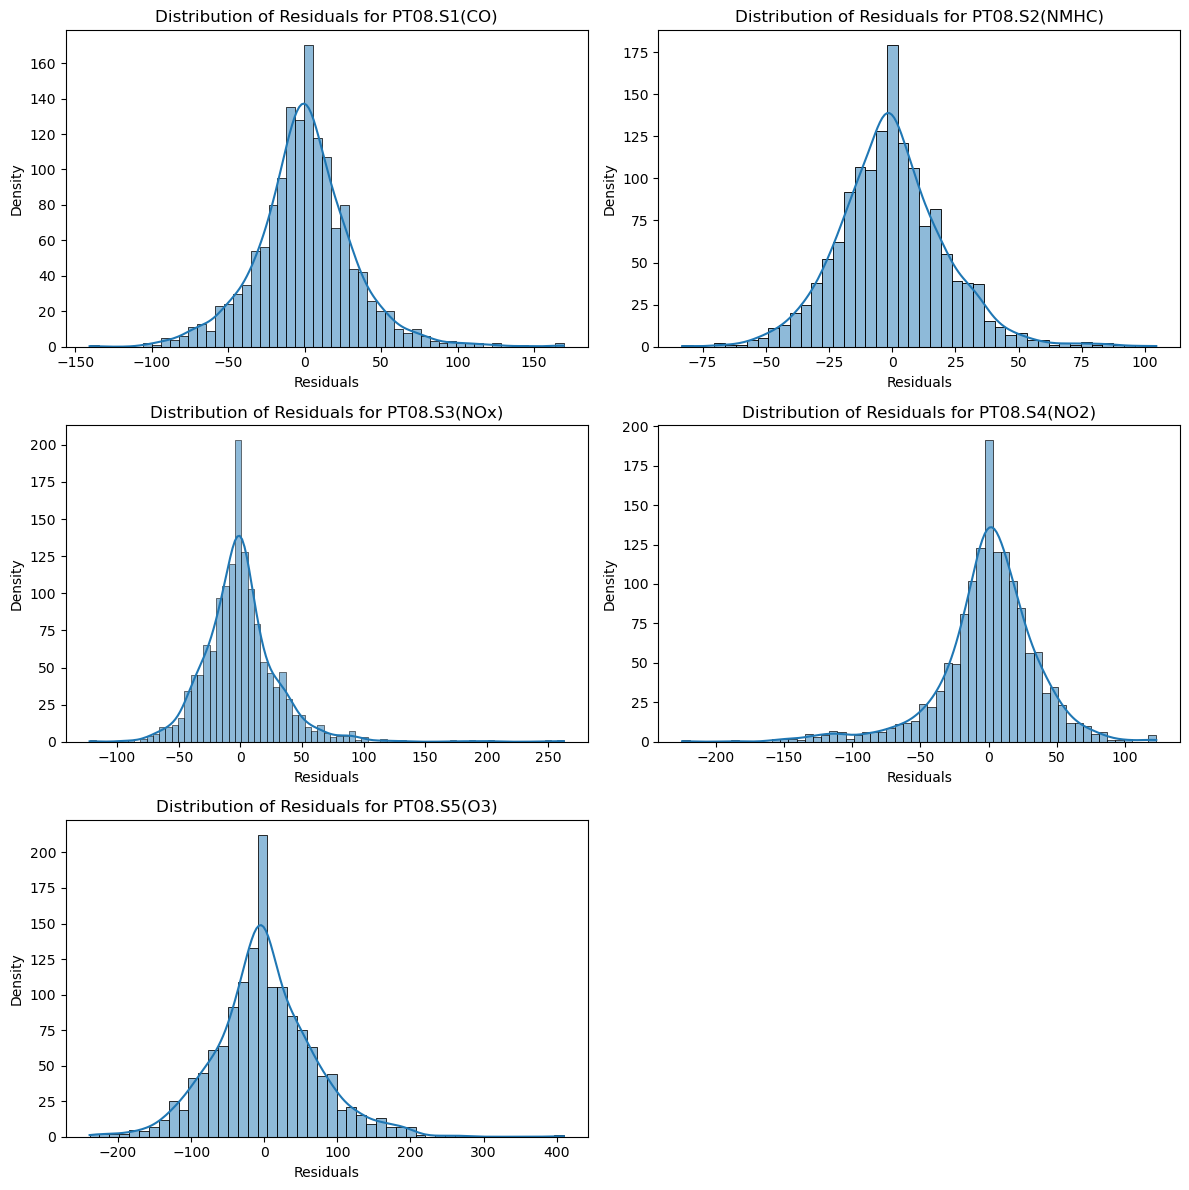

In [48]:
plt.figure(figsize=(12, 4 * rows))

for i, feature in enumerate(features):
    X = airqual_df_filtered.drop(feature, axis=1)
    y = airqual_df_filtered[feature]

    # Initialize and train model
    model = GradientBoostingRegressor(
        random_state=1337, **optimal_params[feature])
    model.fit(X, y)

    # Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1337)

    # Make predictions
    model_predictions = model.predict(X_test)

    # Calculate residuals
    res = pd.DataFrame({'Measured': y_test, 'Predicted': model_predictions})
    res['residuals'] = res['Measured'] - res['Predicted']

    # Create subplot
    plt.subplot(rows, cols, i + 1)
    sns.histplot(data=res, x='residuals', kde=True)
    plt.title(f'Distribution of Residuals for {feature}')
    plt.xlabel('Residuals')
    plt.ylabel('Density')

plt.tight_layout()
# plt.savefig('residuals_distribution.png', dpi=300)
plt.show()

Below are the insights that can be gleamed from the results.

**PT08.S1(CO)**
- Residuals are centered around zero, suggesting model predictions are accurate.
- There are some significant outliers, particularly on the positive side, suggesting instances of underprediction. This is directly related to the decision to use the dataset with outliers even after performing IQR against the data.

**PT08.S2(NMHC)**
- Residuals are mostly centered around zero, but with fewer outliers.
- Distribution is slightly right-skewed, implying a slight tendency to underpredict values.

**PT08.S3(NOx)**
- Broader distribution compared to the first two
- Noticeable skew to the right, indicating more frequent underprediction and greater variability in the model's errors.

**PT08.S4(NO2)**
- Residuals care centered around zero.
- With visible outliers on both side, suggesting occasional significant errors in both under and over-prediction.

**PT08.S5(O3)**
- Shows the most significant skew of all
- Shows consistent trend of underpredicting the true values, particularly for higher levels.

**Residuals vs Predicted Levels**

The second of the analysis and visualization is the Residuals vs. Predicted.

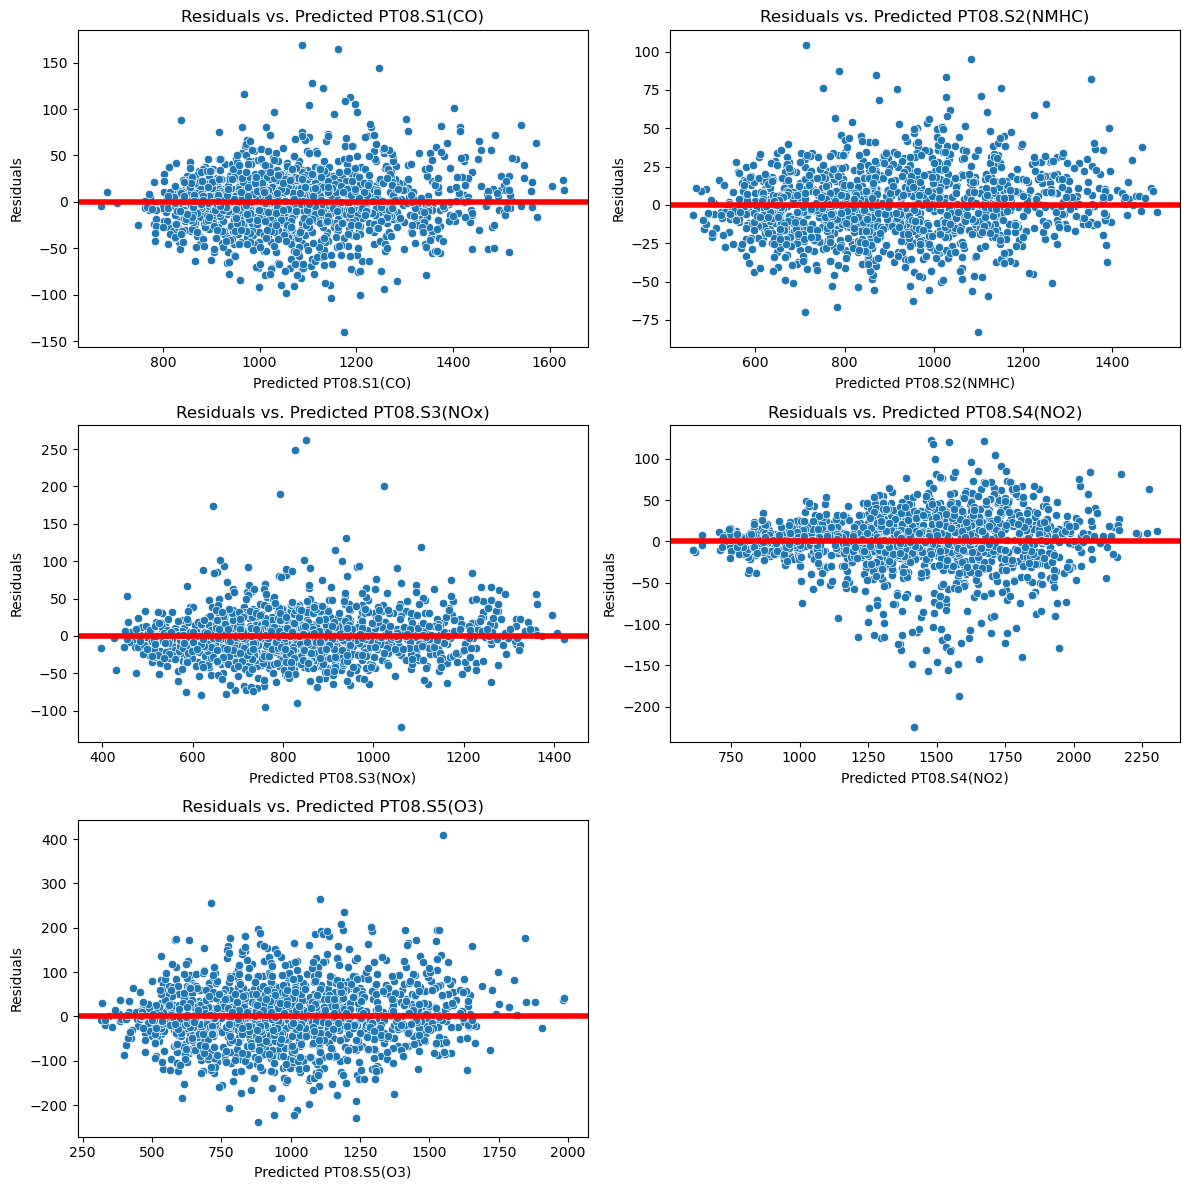

In [49]:
plt.figure(figsize=(12, 4 * rows))

for i, feature in enumerate(features):
    X = airqual_df_filtered.drop(feature, axis=1)
    y = airqual_df_filtered[feature]

    # Initialize and train model
    model = GradientBoostingRegressor(
        random_state=1337, **optimal_params[feature])
    model.fit(X, y)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1337)
    model_predictions = model.predict(X_test)

    # Calculate residuals
    res = pd.DataFrame({'Predicted': model_predictions, 'Measured': y_test})
    res['residuals'] = res['Measured'] - res['Predicted']

    # Plotting residuals vs. predicted values
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(x='Predicted', y='residuals', data=res)
    plt.axhline(y=0.0, color='r', linestyle='-', linewidth=4)
    plt.title(f'Residuals vs. Predicted {feature}')
    plt.xlabel(f'Predicted {feature}')
    plt.ylabel('Residuals')

plt.tight_layout()
# plt.savefig('residuals_vs_predicted.png', dpi=300)

plt.show()

Below are the insights that can be gleamed from the results.

**PT08.S1(CO)** 
- The residuals are somewhat evenly distributed around the zero line. 
- Some outliers. 
- The density of points near the zero line suggests predictions are often close to the actual values.
- No clear pattern of systematic bias across the range of predictions.

**PT08.S2(NMHC)**
- The residuals are more tightly clustered around the zero line.
- No systematic bias is evident.

**PT08.S3(NOx)**
-  The residuals are more tightly clustered around the zero line.
- Several significant outliers indicating occasional large prediction errors.

**PT08.S4(NO2)**
- Residuals are reasonably well clustered around the zero line.
- There seems to be a fan-out pattern at higher predicted values.

**PT08.S5(O3)**
- The residuals are more tightly clustered around the zero line.
- No systematic bias is evident.

**Q-Q Plots**

The third of the analysis and visualization is the Residuals vs. Predicted.

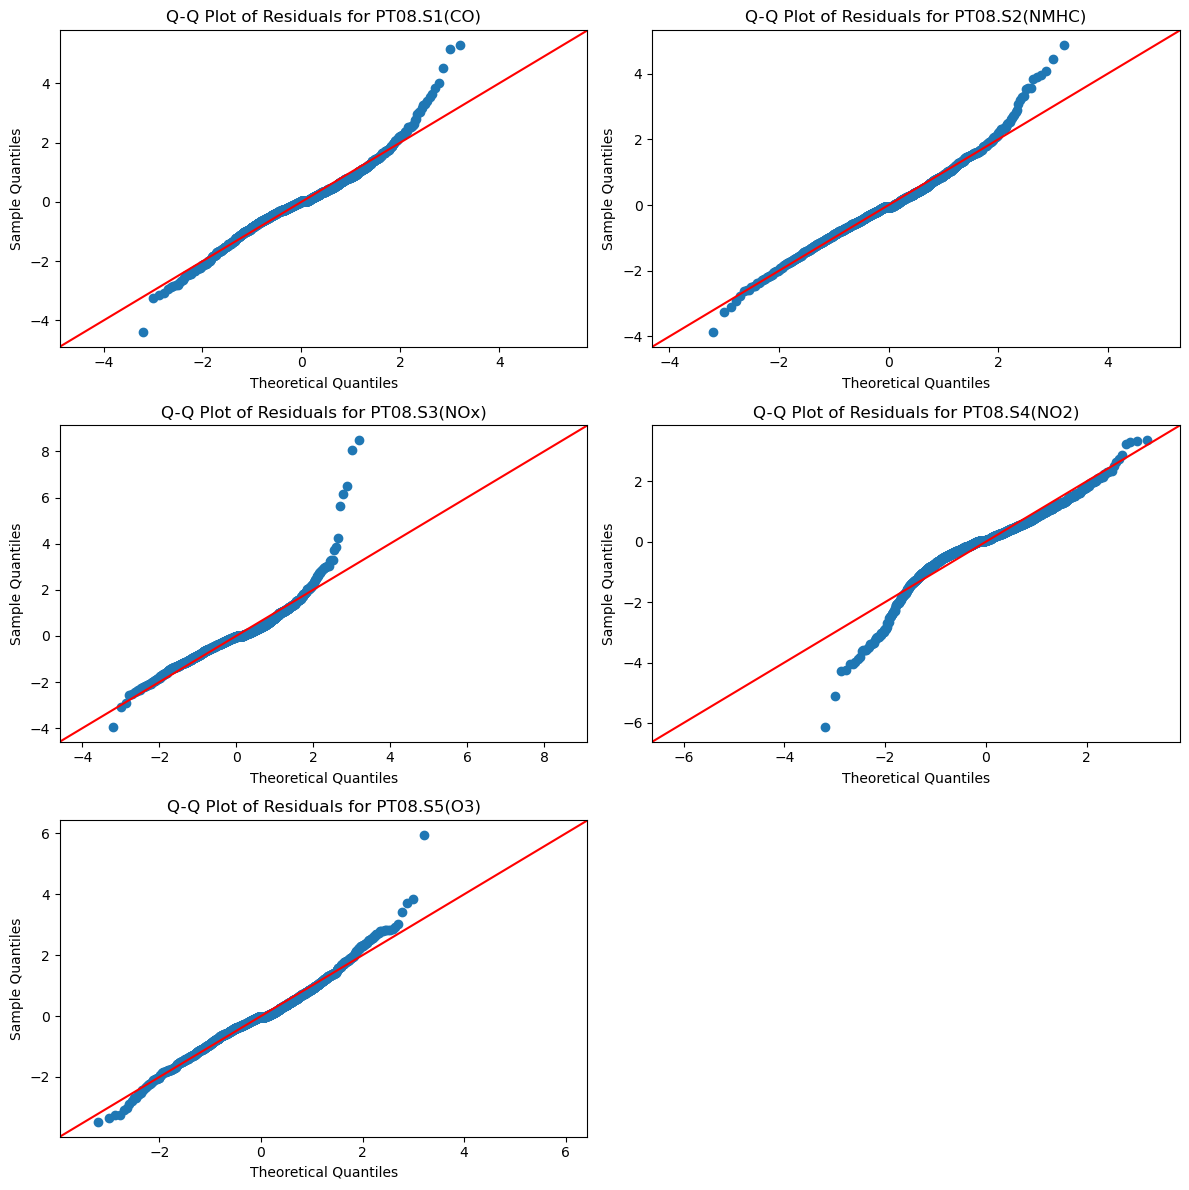

In [50]:
fig, axs = plt.subplots(rows, cols, figsize=(12, 4 * rows))
axs = axs.flatten()

for i, feature in enumerate(features):
    X = airqual_df_filtered.drop(feature, axis=1)
    y = airqual_df_filtered[feature]

    # Initialize and train model
    model = GradientBoostingRegressor(
        random_state=1337, **optimal_params[feature])
    model.fit(X, y)

    # Split the dataset for model evaluation
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=1337)
    model_predictions = model.predict(X_test)

    # Calculate residuals
    res = pd.DataFrame({'Predicted': model_predictions, 'Measured': y_test})
    res['residuals'] = res['Measured'] - res['Predicted']

    # Generate Q-Q plot
    sm.qqplot(res['residuals'], line='45', fit=True, ax=axs[i])
    axs[i].set_title(f'Q-Q Plot of Residuals for {feature}')
    axs[i].set_xlabel('Theoretical Quantiles')
    axs[i].set_ylabel('Sample Quantiles')

if n % cols != 0:
    axs[-1].set_visible(False)

plt.tight_layout()
# plt.savefig('qq_plots.png', dpi=300)
plt.show()

**PT08.S1(CO)**
- The residuals mostly follow the line, suggesting that the residuals are normally distributed.
- Deviations at the tails, particularly in the upper tail, indicate that extreme values are not as well modeled.

**PT08.S2(NMHC)**
- The residuals largely follow the normal distribution line.
- Deviations at the tails indicate a fairly normal distribution of errors but with potential outliers or extreme values.

**PT08.S3(NOx)**
- Significantl deviation from the line in the upper tail, suggests that the residuals have a heavy right tail, which in turn means there are more large positive errors than what would be expected in a normal distribution.

**PT08.S4(NO2)**
- The residuals generally follow the line
- With slight deviations, suggesting a close-to-normal distribution of residuals but possibly with a few outliers or a slight skewness.

**PT08.S5(O3)**
- The residuals  shows a significant deviation from the normal distribution line
- A long right tail indicates that the model has more pronounced errors in the positive direction.

**Cross-Validation**

To assess model performance and ensure its generalizability, cross-validation can be performed. This process helps mitigate the risk of overfitting and provides a more robust estimate of the model's performance on unseen data.

In [51]:
kf = KFold(n_splits=5, shuffle=True, random_state=1337)

y_predict = ['PT08.S1(CO)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)',
             'PT08.S4(NO2)', 'PT08.S5(O3)']

cv_results = {}

for feature in y_predict:
    X = airqual_df_filtered.drop(feature, axis=1)
    y = airqual_df_filtered[feature]

    model = GradientBoostingRegressor(random_state=1337,
                                      **optimal_params[feature])

    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')

    cv_results[feature] = (scores.mean(), scores.std() * 2)

for feature, (mean_score, confidence) in cv_results.items():
    print(f"{feature}: Mean R2 score {mean_score:.3f} with a 95% confidence interval of +/- {confidence:.3f}")

PT08.S1(CO): Mean R2 score 0.916 with a 95% confidence interval of +/- 0.013
PT08.S2(NMHC): Mean R2 score 0.971 with a 95% confidence interval of +/- 0.005
PT08.S3(NOx): Mean R2 score 0.926 with a 95% confidence interval of +/- 0.013
PT08.S4(NO2): Mean R2 score 0.963 with a 95% confidence interval of +/- 0.007
PT08.S5(O3): Mean R2 score 0.895 with a 95% confidence interval of +/- 0.011


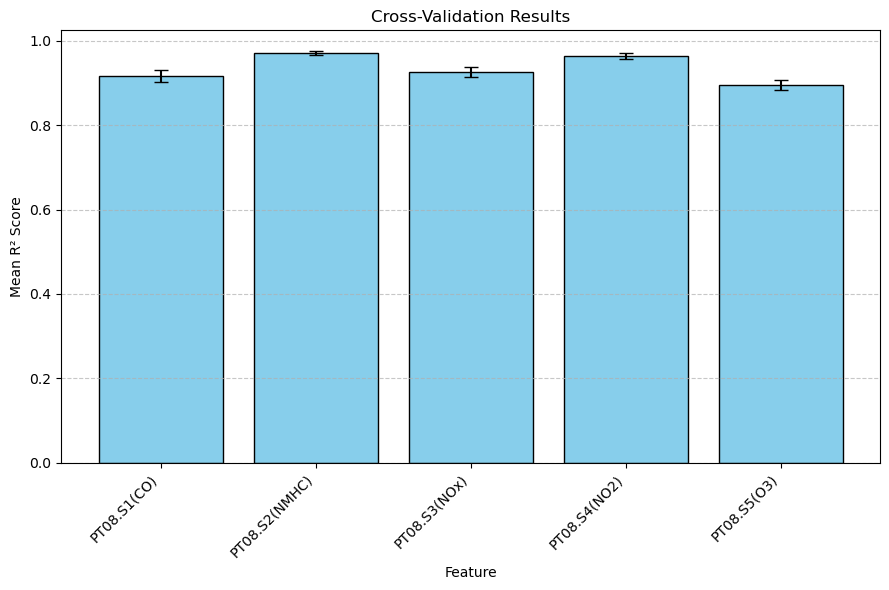

In [52]:
features = list(cv_results.keys())
mean_scores = [cv_results[feature][0] for feature in features]
confidence_intervals = [cv_results[feature][1] for feature in features]

# Calculate the positions of the bars
x_pos = np.arange(len(features))

# Create the bar plot
plt.figure(figsize=(9, 6))
bar_width = 0.35
bars = plt.bar(x_pos, mean_scores, yerr=confidence_intervals, capsize=5, color='skyblue', edgecolor='black')

# Add the feature names as labels
plt.xticks(x_pos, features, rotation=45, ha="right")

plt.xlabel('Feature')
plt.ylabel('Mean R² Score')
plt.title('Cross-Validation Results')
plt.tight_layout()

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
# plt.savefig('cross_validation.png', dpi=300)
plt.show()

The cross-validation results indicate strong performance across all the target features as shown by the consistentnly high $R^2$ score for all features. All results also show a small confidence interval indicating consistent performance across different the different folds. other.

**Feature Importance Analysis**

These cross-validation results suggest that Feature Importance Analysis should be done to investigate which features contribute most to the predictions for each target variable. This can provide insights into how the features influence each other, allowing researches to use secondary indicators in the absence of a primary indicator. 

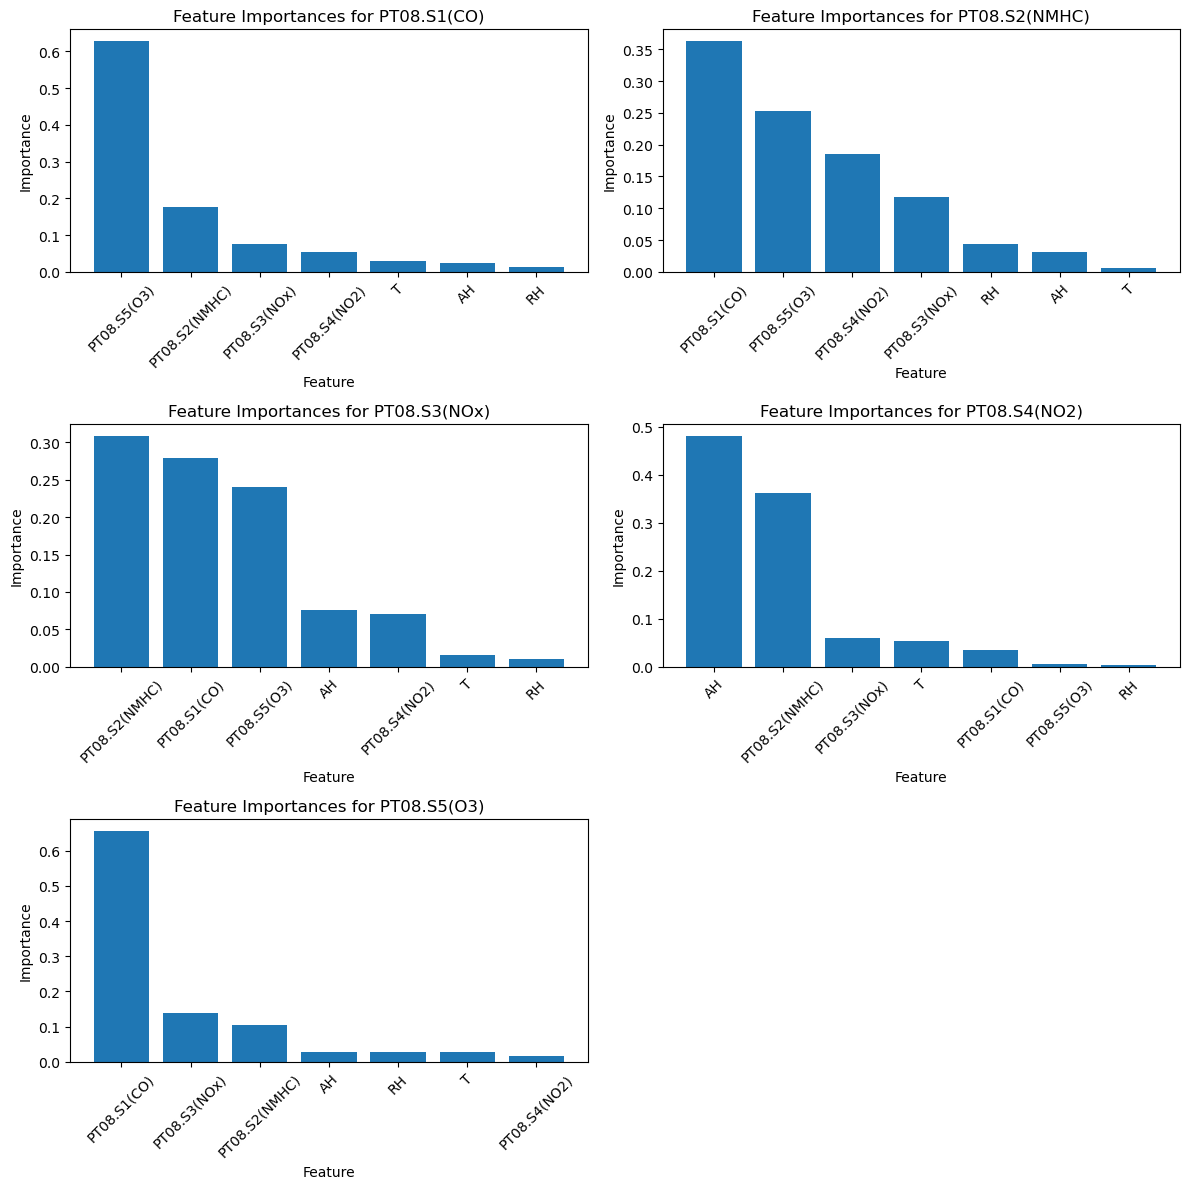

In [53]:
plt.figure(figsize=(12, 4 * rows))

for i, feature in enumerate(features):
    X = airqual_df_filtered.drop(feature, axis=1)
    y = airqual_df_filtered[feature]

    model = GradientBoostingRegressor(random_state=1337,
                                      **optimal_params[feature])
    model.fit(X, y)

    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    labels = X.columns[indices]

    plt.subplot(rows, cols, i+1)
    plt.title(f"Feature Importances for {feature}")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), labels, rotation=45)
    plt.xlabel("Feature")
    plt.ylabel("Importance")

plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300)
plt.show()

Below are the insights from the feature importance analysis.

**Feature Importance for PT08.S1(CO)**
- **Dominant Feature**: `PT08.S5(O3)` is overwhelmingly more important than the others, indicating a strong relationship between `O3` and `CO` levels. It might be capturing most of the variance in `CO` that the model is using to make its predictions.
- **Moderate Importance Features**: The other features contribute to the prediction to a lesser extent.
- **Lesser Importances Features**: The lower importance of meteorological variables `RH` (Relative Humidity), `AH` (Absolute Humidity), and `T` (Temperature), and `T` (Temperature) suggests that they do not contribute significantly to changes in `CO` levels as the other pollutant measurements do.

**Feature Importance for PT08.S2(NMHC)**
- **Dominant Features:** `PT08.S1(CO)` and `PT08.S5(O3)` features stand out as having substantial importance in predicting `PT08.S2(NMHC)`.
- **Moderate Importance Feature:** `PT08.S4(NO2)` shows moderate importance, suggesting a less pronounced but still meaningful relationship with `NMHC`.
- **Lesser Importance Features:** The remaining features, including the meteorological features like `RH` (Relative Humidity), `AH` (Absolute Humidity), and `T` (Temperature), have less influence on predictions for `NMHC` levels, suggesting  that weather conditions have a smaller direct effect on `NMHC` levels than do other pollutants.

**Feature Importance for PT08.S3(NOx)**
- **Dominant Features**: `PT08.S2(NMHC)` and `PT08.S1(CO)` are the most important features, indicating a strong predictive relationship with `NOx` levels.
- **Moderate Importance Feature**: `PT08.S5(O3)` role in the prediction of `NOx` levels is less influential than `NMHC` and `CO` levels.
- **Lesser Importance Features**: The meteorological variables `AH` (Absolute Humidity), `T` (Temperature), and `RH` (Relative Humidity), as well as `PT08.S4(NO2)` feature, show lesser importance.

**Feature Importance for PT08.S4(NO2)**
- **Dominant Feature:** `AH` (Absolute Humidity) stands out as the most significant predictor, which is unusual as typically meteorological variables are of lesser importance for the other features suggesting a unique relationship between humidity and `NO2` levels.
- **Moderate Importance Feature:** `PT08.S2(NMHC)` has the next highest importance, indicating that the levels of `NMHC` are also predictive of `NO2` levels to a lesser extent.
- **Lesser Importance Features:** Other sensor measurements like `PT08.S3(NOx)`, `PT08.S1(CO)`, `T` (Temperature),and `RH` (Relative Humidity), appear to be less important.

**Feature Importance for PT08.S5(O3)**
- **Dominant Feature:** `PT08.S1(CO)` has the highest importance, indicating a strong predictive relationship between `CO` and `O3` levels.
- **Moderate Importance Feature:** `PT08.S3(NOx)` has a moderate level of importance, suggesting a relevant but lesser relationship between `NOx` and `O3` levels.
- **Lesser Importance Features:** `NMHC` `levels` and meteorological variables like `AH` (Absolute Humidity), `T` (Temperature), and `RH` (Relative Humidity) have much lower importance.

-----

### Conclusion and Recommendations

The comprehensive analysis of the `Gradient Boosting Method (GBM)` model demonstrated great performance in predicting key air quality indicators, with R² score ranging from `0.900026` to `0.947633`. Despite GBM having the longest runtime among the evaluated models, its runtime of approximately `1.1 seconds` is deemed manageable and acceptable given its performance benefits.

The comparative analysis between measured and predicted pollutant levels across different metrics reveals a generally close alignment, with specific observations of discrepancies primarily at the distribution tails and in capturing extreme values. The assessment of residuals further supports the model's accuracy, with most residuals centered around zero, indicating reliable predictions. However, the results also suggest some form of overfitting that should be addressed in future implementations of the model. Morever, the presence of outliers and a tendency towards under-prediction and over-predictiion in certain scenarios suggest other areas for improvement.

Recommendations for future work include:
1. **Model Refinement**: Investigate strategies to reduce model runtime and potential overfitting. Potential options include, but is not limited to,  feature selection or model simplification.
2. **Addressing Extremes and Outliers**: Enhance the model's capability to predict extreme values more accurately by incorporating additional data preprocessing steps or outlier-specific modeling techniques. The default IQR threshold of 1.5 is probably too lenient and a better threshold should be identified. This will some domain knowledge and expertise.
3. **Error Analysis**: Conduct a deeper analysis of residuals to understand the under-prediction or overp-rediction trends and apply advanced regression techniques or ensemble methods.
4. **Cross-validation Expansion**: Apply more extensive cross-validation techniques to ensure the model's robustness and generalizability across different datasets and conditions.
5. **More and Better Data Quality**: With more and better data quality, preferably with complete data on the `GT` air quality indicators which were removed at the start of the study, the current model or updated versions of it, could prove to perform better.

### References

De Vito, S. (2016, March 22). Air Quality. UCI Machine Learning Repository. https://archive.ics.uci.edu/dataset/360/air+quality

Murcia, V. (2022, August 31). Predicting pollutant concentration - ml regressors. Kaggle. https://www.kaggle.com/code/vmmr5596/predicting-pollutant-concentration-ml-regressors 